<font color='green'>**TA Comment**: Great project! Very insightful plots and tables

**Grades**:
* Jiayi: 9.81
* Ida: 9.81
* Line: 9.81
</font>

# 02807: Project 2
 
## Practical information
 
* This project must be completed in groups of 3 students.
* This project must be handed in as a Google Colab notebook to the course site on DTU Inside. Go to the Assignments tab to upload your submission. 
* This project is due on Monday, November 30, 20:00.
* Each group has to hand in *one* notebook with their solutions.
* Your code must be written in Python/PySpark.
* For each question you may use as many cells for your solution as you like.
* You should not remove the problem statements.
* Your notebook should be runnable, i.e., clicking in the code cells should display the result that you want to have assessed.  
* You are not expected to use machine learning to solve any of the exercises.
 
## Colaboration policy
 
* It is not allowed to collaborate on the exercises with students outside your group, except for discussing the text of the exercise with teachers and fellow students enrolled on the course in the same semester. 
* It is not allowed to exchange, hand-over or in any other way communicate solutions or parts of solutions to the exercises. 
* It is not allowed to use solutions from similar courses, or solutions found elsewhere.

## Contribution table and grading

* The total amount of points in the project is 105.
* You have to indicate who has solved each part of each exercise in a **contribution table**. 
* The following is an example of a contribution table:

|        | Exercise 1 | Exercise 2 | Exercise 3 | Exercise 4 |
|--------|------------|------------|------------|------------|
| **Part 1** | John       |    Mary        |     Ann       |   Mary, Ann         |
| **Part 2** |     Mary       |    Mary        |   Ann         |    John, Ann        |
| **Part 3** |     John, Mary, Ann       |      John, Ann      |   John         | **n.a.**      |
| **Part 4** | **n.a.**       |  Ann          |     John, Mary       | **n.a.**       |
| **Part 5** | **n.a.**     | John, Mary, Ann           | **n.a.**       | **n.a.**       |
| **Part 6** | **n.a.**       | John, Mary, Ann           | **n.a.**      | **n.a.**      |

* A group member can take credit for solving a part of an exercise only if they have contributed **substantially** to the solution. 
* Simple contributions, such as correcting a small bug or double-checking the results of functions, are not sufficient for taking credit for a solution.
* Several group members can take credit for the same solution if they all have contributed substantially to it.
* **Each group member must solve at least 105/3=35 points**. 
* **If no name is provided for an exercise's part, all group members will be assigned responsibility for it**.
* Group members should decide amongst themselves how to collaborate on the project to meet the above-mentioned constraints.  
* Grades are individual. The grade $\text{grade}(m)$ for a group member $m$ ranges from 0 to 10 and is calculated as follows: 

  * $\text{individual-score}(m) = \frac{\text{total number of points for the parts correctly solved by }m}{\text{total number of points for the parts contributed by }m}$

  * $\text{group-score} = \frac{\text{total number of points correctly solved by any group member}}{\text{total number of points in the project}}$

  * $\text{grade}(m) =  7.5 \cdot \text{individual-score}(m) + 2.5 \cdot \text{group-score}$

* **Example**: in the contribution table above, suppose that all parts are solved correctly except for those of Exercise 4, which are both wrong. Then Ann's grade is calculated as follows:

  * $\text{individual-part}(Ann) = \frac{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5}{2.5 + 2.5 + 10 + 10 + 5 + 10 + 5 + 10 + 10} = \frac{45}{65} = 0.692$

  * $\text{group-part} = \frac{85}{105} = 0.809$

  * $\text{grade}(Ann) =  7.14$


# Guidelines
- Data processing should be done using PySpark. Once data has been reduced to aggregate form, you may use collect to extract it into Python for visualisation.
- Your solutions will be evaluated by correctness, code quality and interpretability of the output. This means that you have to write clean and efficient Spark code that will generate sensible execution plans, and that the tables and visualisations that you produce are meaningful and easy to read.
- You may add more cells for your solutions, but you should not modify the notebook otherwise.

# Group declaration table 

This table must be filled before submission.



In [ ]:
import pandas as pd

d = {'Exercise 1' : ["", "", "", "", "", "", "", "", ""], 
     'Exercise 2' : ["", "", "", "", "", "", "", "", ""],
     } 
  
ct = pd.DataFrame(d, index =['Part 1','Part 2.1','Part 2.2','Part 2.3','Part 2.4','Part 2.5','Part 2.6','Part 3.1','Part 3.2']) 

ct

,Exercise 1,Exercise 2
Part 1,,
Part 2.1,,
Part 2.2,,
Part 2.3,,
Part 2.4,,
Part 2.5,,
Part 2.6,,
Part 3.1,,
Part 3.2,,


# Create Spark session and define imports

In [ ]:
!sudo apt-get update

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease [21.3 kB]
Get:12 http://security.ubuntu.com/ub

In [1]:
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
!pip install pyarrow --upgrade
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Let's import the libraries we will need
import pyspark
from pyspark.sql import *
from pyspark import SparkContext, SparkConf
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

# create the Spark session
conf = SparkConf().set("spark.ui.port", "4050")
sc = pyspark.SparkContext(conf=conf)
spark = SparkSession.builder.getOrCreate()
spark.catalog.clearCache()

     |████████████████████████████████| 204.2MB 42kB/s 
     |████████████████████████████████| 204kB 40.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=2f95a1e97f2fa84dfe27d61b2ff4c0c8118c45498f4034bac069de9f35b06944
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 14 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Selecting previously unselected package openjdk-8-jre-headless:amd64.
(Reading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Exercise 1: Airbnb analysis (52.5 points)


## Introduction

<img src="https://www.esquireme.com/public/images/2019/11/03/airbnb-678x381.jpg" alt="airbnb" width="600"/>

[Airbnb](http://airbnb.com) is an online marketplace for arranging or offering lodgings. In this exercise you will use Spark to analyze data obtained from the Airbnb website. The purpose of the analysis is to extract information about trends and patterns from the data.

The project has two parts.

### Part 1: Loading, describing and preparing the data
There's quite a lot of data. Make sure that you can load and correctly parse the data, and that you understand what the dataset contains. You should also prepare the data for the analysis in part two.

### Par 2: Analysis
In this part your goal is to learn about trends and usage patterns from the data. You should give solutions to the tasks defined in this notebook, and you should use Spark to do the data processing. You may use other libraries like for instance Pandas and matplotlib for visualisation.


## Part 1: Loading, describing and preparing the data (2.5 pts)
The data comes in two files. Start by downloading the files.

- [Listings](https://files.dtu.dk/u/lT8jJJs_IyiHPyMs/listings.csv?l) (5 GB)
- [Reviews](https://files.dtu.dk/u/yH8FBcZ_BQjafwUN/reviews.csv?l) (9.5 GB)

### Load the data
The data has multiline rows (rows that span multiple lines in the file). To correctly parse these you should use the `multiLine` option and set the `escape` character to be `"`.

**Answer:** First the scema is defined for both the listings and the reviews. Each column is defined as a structfield with a given type. Moreover, all columns allow nullables.

In [ ]:
# Define schema for listings
listings_schema = StructType([StructField('id', IntegerType(), True),
                              StructField('listing_url',StringType(),True),
                              StructField('scrape_id', IntegerType(), True),
                              StructField('last_scraped',DateType(), True),
                              StructField('name', StringType(), True),
                              StructField('summary', StringType(), True),
                              StructField('space', StringType(), True), 
                              StructField('description', StringType(),True),
                              StructField('experiences_offered', StringType(), True),
                              StructField('neighbourhood_overview',StringType(),True),
                              StructField('notes', StringType(),True),
                              StructField('transit', StringType(),True),
                              StructField('access', StringType(),True),
                              StructField('interaction',StringType(), True),
                              StructField('house_rules',StringType(),True),
                              StructField('thumbnail_url', StringType(),True),
                              StructField('medium_url',StringType(),True),
                              StructField('picture_url',StringType(),True),
                              StructField('xl_picture_url',StringType(),True),
                              StructField('host_id', IntegerType(),True),
                              StructField('host_url', StringType(),True),
                              StructField('host_name', StringType(),True),
                              StructField('host_since', DateType(),True),
                              StructField('host_location', StringType(),True),
                              StructField('host_about', StringType(),True),
                              StructField('host_response_time', StringType(),True),
                              StructField('host_response_rate', StringType(),True),
                              StructField('host_acceptance_rate', StringType(),True),
                              StructField('host_is_superhost',StringType(),True),
                              StructField('host_thumbnail_url',StringType(),True),
                              StructField('host_picture_url',StringType(),True),
                              StructField('host_neighbourhood',StringType(),True),
                              StructField('host_listings_count',IntegerType(),True),
                              StructField('host_total_listings_count',IntegerType(),True),
                              StructField('host_verifications',StringType(),True),
                              StructField('host_has_profile_pic',StringType(),True),
                              StructField('host_identity_verified',StringType(),True),
                              StructField('street',StringType(),True),
                              StructField('neighbourhood',StringType(),True),
                              StructField('neighbourhood_cleansed',StringType(),True),
                              StructField('neighbourhood_group_cleansed',StringType(),True),
                              StructField('city' ,StringType(),True),
                              StructField('state',StringType(),True),
                              StructField('zipcode' ,StringType(),True),
                              StructField('market',StringType(),True),
                              StructField('smart_location',StringType(),True),
                              StructField('country_code',StringType(),True),
                              StructField('country',StringType(),True),
                              StructField('latitude',FloatType(),True),
                              StructField('longitude',FloatType(),True),
                              StructField('is_location_exact',StringType(),True),
                              StructField('property_type',StringType(),True),
                              StructField('room_type',StringType(),True),
                              StructField('accommodates',IntegerType(),True),
                              StructField('bathrooms',IntegerType(),True),
                              StructField('bedrooms',IntegerType(),True),
                              StructField('beds',IntegerType(),True),
                              StructField('bed_type',StringType(),True),
                              StructField('amenities',StringType(),True),
                              StructField('square_feet',StringType(),True),
                              StructField('price',StringType(),True),
                              StructField('weekly_price',StringType(),True),
                              StructField('monthly_price',StringType(),True),
                              StructField('security_deposit',StringType(),True),
                              StructField('cleaning_fee',StringType(),True),
                              StructField('guests_included',IntegerType(),True),
                              StructField('extra_people',StringType(),True),
                              StructField('minimum_nights',IntegerType(),True),
                              StructField('maximum_nights',IntegerType(),True),
                              StructField('minimum_minimum_nights',IntegerType(),True),
                              StructField('maximum_minimum_nights',IntegerType(),True),
                              StructField('minimum_maximum_nights',IntegerType(),True),
                              StructField('maximum_maximum_nights',IntegerType(),True),
                              StructField('minimum_nights_avg_ntm',FloatType(),True),
                              StructField('maximum_nights_avg_ntm',FloatType(),True),
                              StructField('calendar_updated',StringType(),True),
                              StructField('has_availability',StringType(),True),
                              StructField('availability_30',IntegerType(),True),
                              StructField('availability_60',IntegerType(),True),
                              StructField('availability_90',IntegerType(),True),
                              StructField('availability_365',IntegerType(),True),
                              StructField('calendar_last_scraped',DateType(),True),
                              StructField('number_of_reviews',IntegerType(),True),
                              StructField('number_of_reviews_ltm',IntegerType(),True),
                              StructField('first_review',DateType(),True),
                              StructField('last_review',DateType(),True),
                              StructField('review_scores_rating',IntegerType(),True),
                              StructField('review_scores_accuracy',IntegerType(),True),
                              StructField('review_scores_cleanliness',IntegerType(),True),
                              StructField('review_scores_checkin',IntegerType(),True),
                              StructField('review_scores_communication',IntegerType(),True),
                              StructField('review_scores_location',IntegerType(),True),
                              StructField('review_scores_value',IntegerType(),True),
                              StructField('requires_license',StringType(),True),
                              StructField('license',StringType(),True),
                              StructField('jurisdiction_names',StringType(),True),
                              StructField('instant_bookable' ,StringType(),True),
                              StructField('is_business_travel_ready',StringType(),True),
                              StructField('cancellation_policy',StringType(),True),
                              StructField('require_guest_profile_picture',StringType(),True),
                              StructField('require_guest_phone_verification',StringType(),True),
                              StructField('calculated_host_listings_count',IntegerType(),True),
                              StructField('calculated_host_listings_count_entire_homes',IntegerType(),True),
                              StructField('calculated_host_listings_count_private_rooms',IntegerType(),True),
                              StructField('calculated_host_listings_count_shared_rooms',IntegerType(),True),
                              StructField('reviews_per_month',FloatType(),True)
                              ])

In [ ]:
# Define schema for reviews
reviews_schema = StructType([StructField('listing_id', IntegerType(), True),
                              StructField('id', IntegerType(), True),
                              StructField('date', DateType(), True),
                              StructField('reviewer_id', IntegerType(), True),
                              StructField('reviewer_name', StringType(), True),
                              StructField('comments', StringType(), True)
                              ])

**Answer:** Both CSV files are load with the schema to a PySpark dataframe.

In [ ]:
path_listings = "/content/drive/My Drive/listings.csv"
df_listings = spark.read.csv(path_listings, header=True, multiLine=True, escape='"', schema = listings_schema)

path_reviews = "/content/drive/My Drive/reviews.csv"
df_reviews = spark.read.csv(path_reviews, header=True, multiLine=True, escape='"', schema = reviews_schema)


### Describe the data
List the features (schema) and sizes of the datasets.

**Answer:** We count the number of rows in both the listings and reviews dataframe to obtain the size of the datasets. The features/schema are printed along with the size.

In [ ]:
print("In total there are {0} listings".format(df_listings.count()))
df_listings.printSchema()

In total there are 1330480 listings
root
 |-- id: integer (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: integer (nullable = true)
 |-- last_scraped: date (nullable = true)
 |-- name: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- space: string (nullable = true)
 |-- description: string (nullable = true)
 |-- experiences_offered: string (nullable = true)
 |-- neighbourhood_overview: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- transit: string (nullable = true)
 |-- access: string (nullable = true)
 |-- interaction: string (nullable = true)
 |-- house_rules: string (nullable = true)
 |-- thumbnail_url: string (nullable = true)
 |-- medium_url: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- xl_picture_url: string (nullable = true)
 |-- host_id: integer (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: date (nullable = true)


In [ ]:
print("In total there are {0} reviews".format(df_reviews.count()))
df_reviews.printSchema()

In total there are 32297300 reviews
root
 |-- listing_id: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- date: date (nullable = true)
 |-- reviewer_id: integer (nullable = true)
 |-- reviewer_name: string (nullable = true)
 |-- comments: string (nullable = true)



### Prepare the data for analysis
You should prepare two dataframes to be used in the analysis part of the project. You should not be concerned with cleaning the data. There's a lot of it, so it will be sufficient to drop rows that have bad values. You may want to go back and refine this step at a later point when doing the analysis.


**Answer:** In our preprocessing we start by casting all upper level letters to lower level letters in the column "city", to make sure that we do not distinguish between them. We then remove any city, that has a number in their name, since we might have a hard time analysing those. Moreover, we divide the column for "price" into to columns - one for the currency and one for the actual price as type integer.
Finally we drop all listings, that do not have a "city" or "review_scores_rating" given. For the reamining rows is the type of "review_scores_rating" cast to integer.

In [ ]:
# Casting upper level letters to lower level letters
df_listings = df_listings.withColumn("city", F.lower(F.col('city')))
df_listings = df_listings.withColumn("neighbourhood_cleansed", F.lower(F.col('neighbourhood_cleansed')))

# Remove cities which name contains a number
def any_digits(value):
  if value:
    return value.isalpha()
  else:
    return False 

any_digits_udf = udf(any_digits, BooleanType())
df_listings = df_listings.withColumn('city', when(any_digits_udf(df_listings['city']),df_listings['city']))

# Dropping all listings city being None
df_listings = (df_listings.na.drop(subset=["city"]))

# Divding the currency into two columns - one integer for the prize and one
# string for currency
df_listings = (df_listings
              .withColumn("currency", when(col("price").contains('$'),'USD'))
              .withColumn("price", F.split(df_listings["price"], '\$')[1])
              .withColumn("price", regexp_replace("price",",",""))
              .withColumn("price", F.col("price").astype(IntegerType()))
              )

# Dropping all listings without a "review_scores_rating" and casting to integer
df_listings = (df_listings
                .na.drop(subset=["review_scores_rating"])
                .withColumn("review_scores_rating", F.col("review_scores_rating").astype(IntegerType()))
                )

In [ ]:
df_listings.show()

+------+--------------------+---------+------------+--------------------+--------------------+--------------------+--------------------+-------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+----------+--------------------+--------------+-------+--------------------+---------+----------+--------------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+--------------------+------------------+-------------------+-------------------------+--------------------+--------------------+----------------------+--------------------+-------------+----------------------+----------------------------+-----------+----------------+-------+---------+-------------------+------------+-------+--------+---------+-----------------+-----------------+---------------+------------+---------+--------+----+--------+--------------------+-

In [ ]:
df_reviews.show()

+----------+---------+----------+-----------+-------------+--------------------+
|listing_id|       id|      date|reviewer_id|reviewer_name|            comments|
+----------+---------+----------+-----------+-------------+--------------------+
|    145320|156423122|2017-05-30|  123386382|        Erwin|Prima plek om Sto...|
|    145320|170211906|2017-07-15|  123091743|         Anne|Cosy and clean fl...|
|    145320|172169175|2017-07-20|      78004|     Patricia|The host canceled...|
|    145320|176647581|2017-07-31|  103178743|    Charlotte|Kim's place was o...|
|    145320|185676021|2017-08-22|    4023961|    Alexander|great spacious ap...|
|    145320|189668224|2017-09-02|  142869362|        Heiko|Kim is a very fri...|
|    145320|191894030|2017-09-09|   25194419|        Jason|The apartment is ...|
|    145320|193316070|2017-09-13|   52056015|        David|Nicely appointed,...|
|    145320|196760607|2017-09-24|    3980456|        Janne|It was a pleasure...|
|    145320|201885633|2017-1

## Part 2: Analysing the data (50 pts)
Use Spark and your favorite tool for data visualization to solve the following tasks. Imagine that you are talking to your colleagues or your new boss. Think about how you present the data. Include headers, legends and well-written descriptions for graphs/charts. Think of the solutions you provide as an "executive summary" of your findings. You should put an effort in presentation and writing, not just coding.


### 2.1: The basics (10 pts)
Compute and visualise a dataframe with the number of listings and neighbourhoods per city.

**Answer:** All listings are grouped by the city they are listed in, whereupon the number of listings and the distinct neighbourhoods in each city are counted. A dataframe is showed along with a scatter plot, where the number of neighbourhoods is plotted as a function of the number of listings in each cities.

In [ ]:
# For each city then count the number of listing and number of different neighbourhoods
df_city = (df_listings.groupBy('city').agg(F.count('city').alias("number_of_listings"),
                                           F.countDistinct('neighbourhood_cleansed')
                                           .alias("number_of_neighbourhoods")))
df_city.show()

+----------+------------------+------------------------+
|      city|number_of_listings|number_of_neighbourhoods|
+----------+------------------+------------------------+
|  montréal|             13520|                      24|
|mordialloc|                15|                       1|
|  carnegie|                64|                       2|
|   praiola|                 2|                       1|
|  panormos|                95|                       3|
|     tinos|               352|                       1|
|swanbourne|                19|                       3|
|    gloria|                 1|                       1|
|  cremorne|               155|                       4|
| villarosa|                 4|                       1|
|   lampini|                13|                       1|
|     nunez|                 1|                       1|
|  hermance|                 4|                       1|
|    royton|                 1|                       1|
|  mililani|                17|

Text(0, 0.5, 'Number of neighbourhoods')

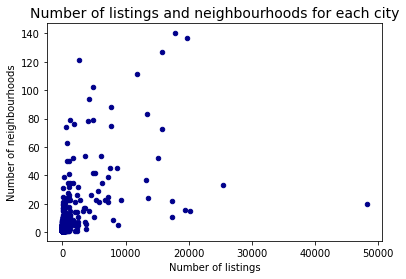

In [ ]:
# Histogam of neighbourhoods per city
ax = df_city.toPandas().plot.scatter(x='number_of_listings',
                      y='number_of_neighbourhoods',
                      c='DarkBlue')
ax.set_title("Number of listings and neighbourhoods for each city", fontsize = 14);
ax.set_xlabel("Number of listings") 
ax.set_ylabel("Number of neighbourhoods")

Based on the table above, you should choose a city that you want to continue your analysis for. The city should have mulitple neighbourhoods with listings in them.

Compute and visualize the number of listings of different property types per neighbourhood in your city.

**Answer:** We choose the city Stockholm and start by creating a dataframe with only listings in Stockholm. We then compute the number of listings for each property type in all neighbourhoods and finally show the distribution on properties for each neighbourhood in a pie chart.

In [ ]:
# Saving all the data from Stockholm into a seperate dataframe
df_stockholm = df_listings.filter(F.col('city') == 'stockholm').cache()

In [ ]:
# Computing number of listings of different property types per neighbourhood in Stockholm
df_list_property = (df_stockholm
                    .groupBy('neighbourhood_cleansed','property_type')
                    .agg(F.count('property_type')
                    .alias('number_of_listings')))
df_list_property = (df_list_property
                    .groupby(df_list_property.neighbourhood_cleansed)
                    .pivot('property_type').avg('number_of_listings'))

df_list_property.show()

+----------------------+----------+---------+----+-----------------+----+--------------+-----+-----------+-----------+----------+------+-----+-----+---------+----+-----+------------------+---------+-----+
|neighbourhood_cleansed|Aparthotel|Apartment|Barn|Bed and breakfast|Boat|Boutique hotel|Cabin|Condominium|Guest suite|Guesthouse|Hostel|Hotel|House|Houseboat|Loft|Other|Serviced apartment|Townhouse|Villa|
+----------------------+----------+---------+----+-----------------+----+--------------+-----+-----------+-----------+----------+------+-----+-----+---------+----+-----+------------------+---------+-----+
|            södermalms|      null|    996.0|null|              4.0| 3.0|          null| null|       24.0|        1.0|      null|   1.0| null|  5.0|      1.0|25.0|  1.0|               3.0|     null| null|
|                bromma|       3.0|     88.0|null|             null|null|          null|  1.0|       null|       null|      null|  null| null| 40.0|     null| 2.0| null|           

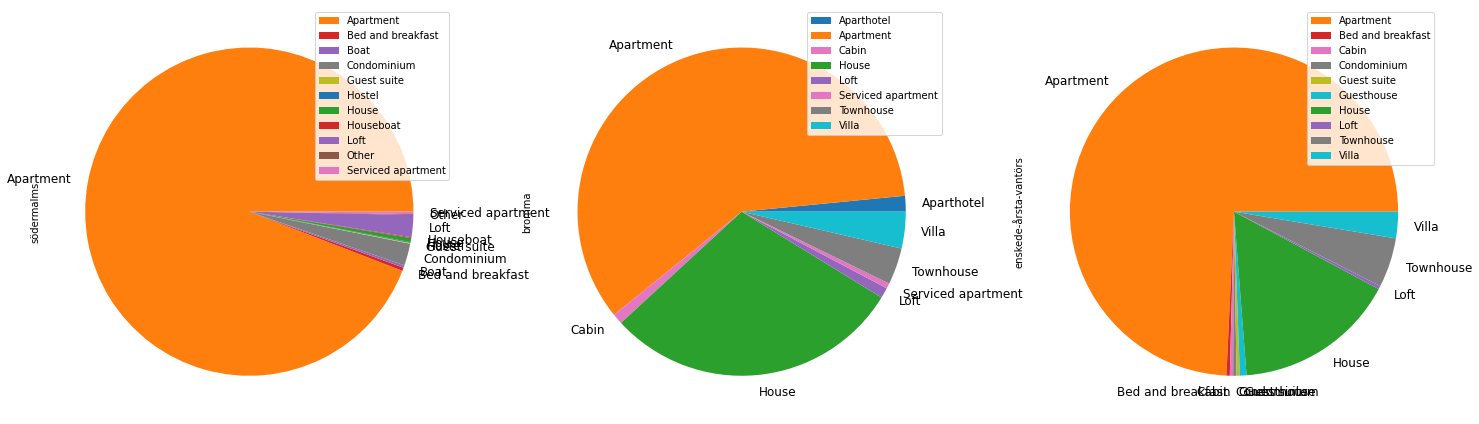

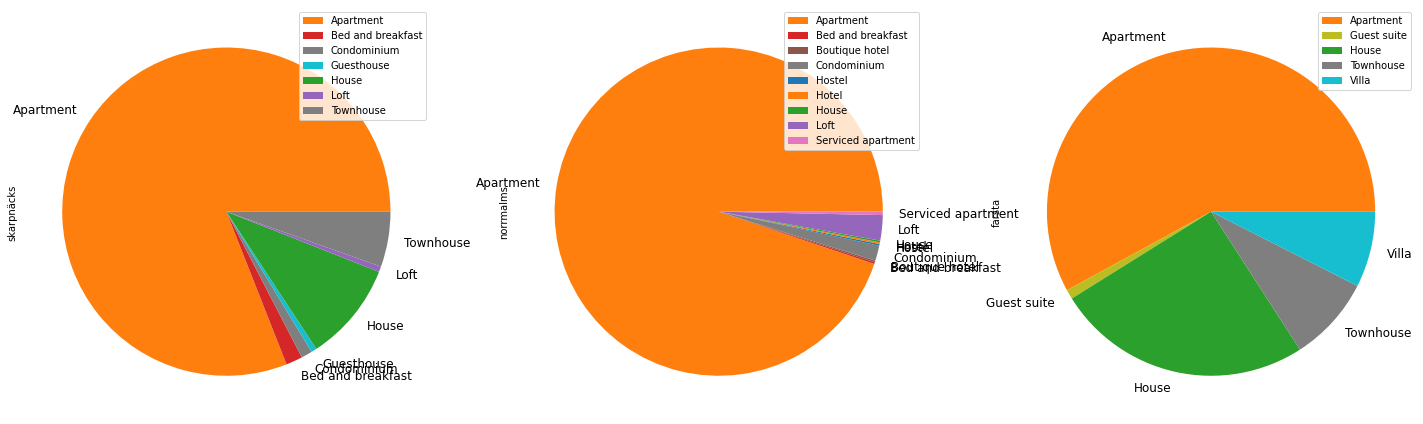

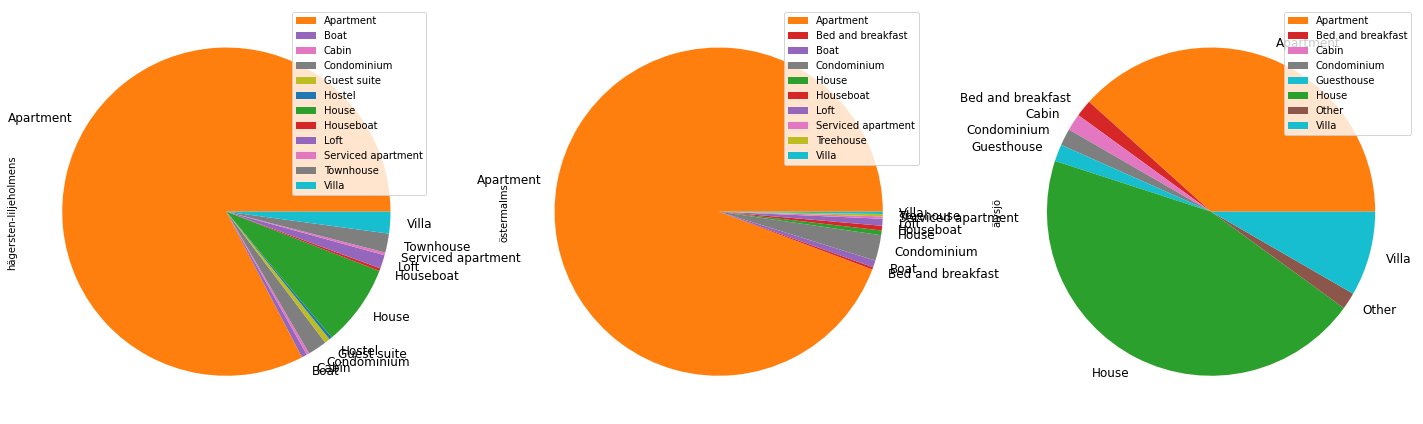

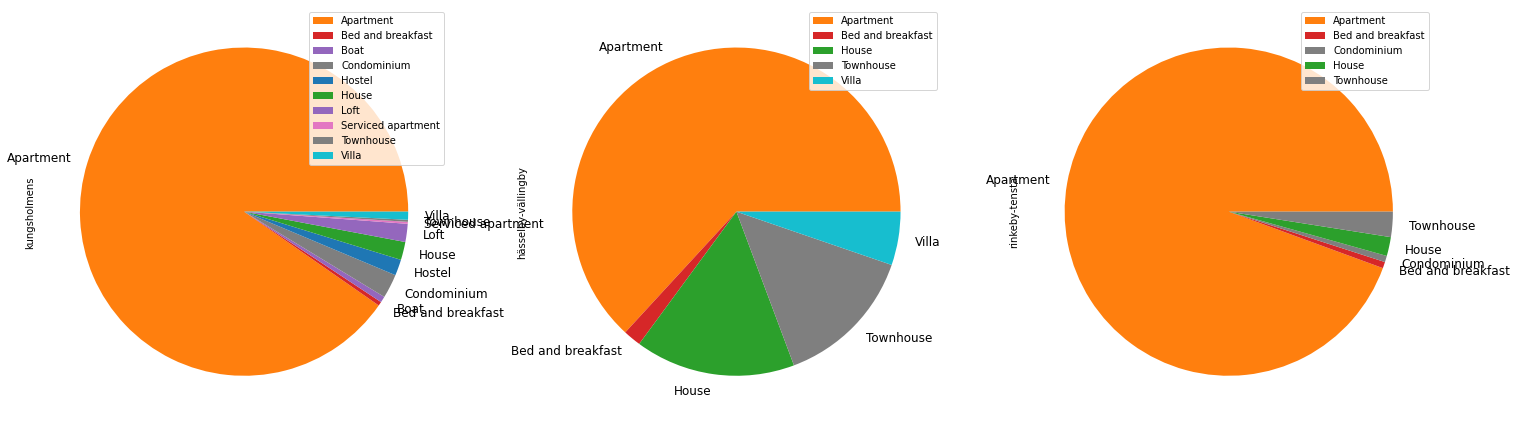

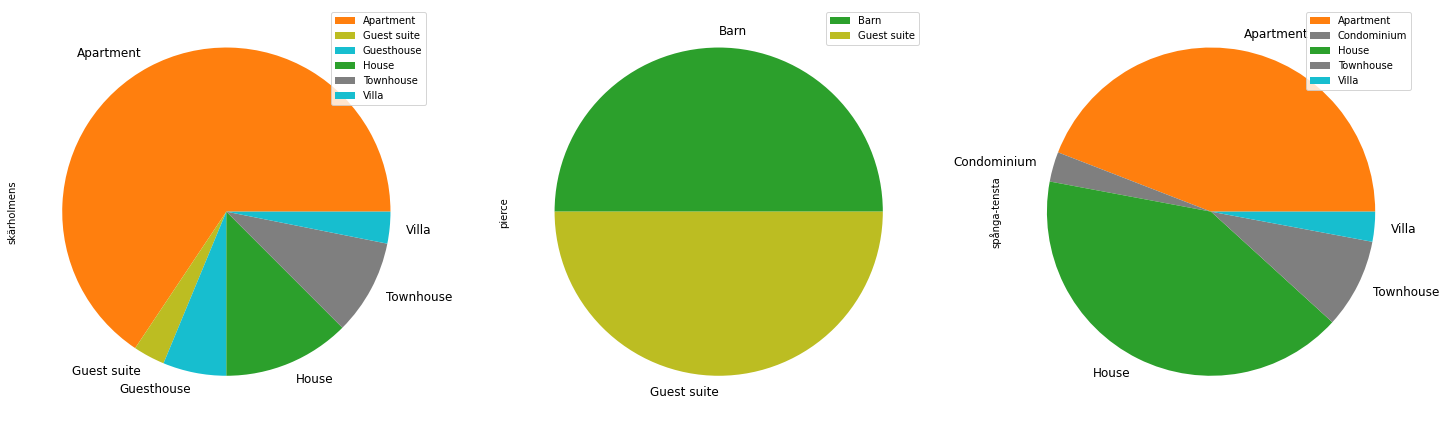

In [ ]:
# Make pie charts - one for each neighbourhood
df_property_pd = df_list_property.toPandas().set_index('neighbourhood_cleansed')
for i in range(5):
    plot = df_property_pd[0+3*i:3+3*i].T.plot.pie(subplots=True, figsize=(25, 10),fontsize=12)

**Answer:** We see that there are 19 different types of properties in Stockholm. For each of the 15 neighbourhoods a pie chart is created and it is clear that for all neighbourhoods except three, the property type "Apartment" comprise more than 50% of the listings.

### 2.2. Prices (10 pts)
Compute the minimum, maximum and average listing price in your city.

**Answer:** The average, minimum, and maximum price in euros is computed.

In [ ]:
# Minimum, maximum, and average prices
df_minmax_price = df_stockholm.select(F.avg('price'), F.max('price'), F.min('price')).show()

+------------------+----------+----------+
|        avg(price)|max(price)|min(price)|
+------------------+----------+----------+
|1091.5018094089264|     10155|        69|
+------------------+----------+----------+



Compute and visualise the distribution of listing prices in your city. Write a paragraph describing your findings.

Text(0.5, 1.0, 'Boxplot of prices, without outliers')

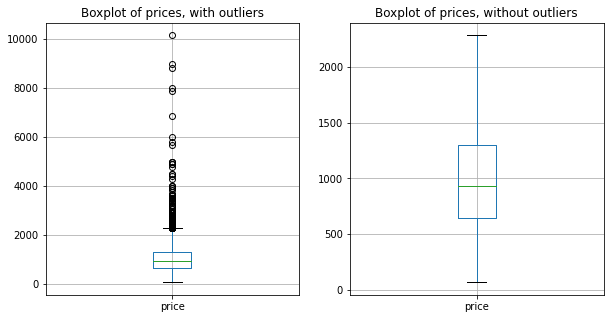

In [ ]:
# Saving all prices to Pandas
price_pd = df_stockholm.select("price").toPandas()

# Boxplot of prices with outliers
fig = plt.figure(figsize=(10, 5))
ax = plt.subplot(1,2 ,1)
ax.boxplot_noOutliers = price_pd.boxplot(column=['price'])
plt.title("Boxplot of prices, with outliers")

# Boxplot of prices without outliers
ax = plt.subplot(1,2 ,2)
ax.boxplot_outliers = price_pd.boxplot(column=['price'], showfliers=False)
plt.title("Boxplot of prices, without outliers")

**Answer:** By computing the minimum, maximum, and average prize per listing it is clear, that the span of prices is great. The two boxplots show the distribution of prices with and without inclusding outliers, respectively. All outliers are upper outliers and they become increasingly spread out. When disregarding the outliers the prices are somewhat normally distributed with a median price around 900 euros.

The value of a listing is its rating divided by its price. Compute and show a dataframe with the 3 highest valued listings in each neighbourhood.

**Answer:** A new column with the value of each listing is made, by dividing the "review_scores_rating" with the price. A dataframe wiwth the top three values per neighbourhood is showed.


In [ ]:
df_stockholm_value = (df_stockholm
                      .withColumn("value", (F.col("review_scores_rating")/F.col("price")))
                      )
df_value = df_stockholm_value.groupBy('neighbourhood_cleansed').agg(F.sort_array(collect_list("value"), asc=False).alias('Top3'))
df_value.select('neighbourhood_cleansed',
                F.round(df_value.Top3[0],4).alias('1st valued'),
                F.round(df_value.Top3[1],4).alias('2nd valued'),
                F.round(df_value.Top3[2],4).alias('3rd valued')).show()

+----------------------+----------+----------+----------+
|neighbourhood_cleansed|1st valued|2nd valued|3rd valued|
+----------------------+----------+----------+----------+
|            södermalms|      0.33|    0.3234|    0.3231|
|                bromma|    0.7949|    0.4444|     0.375|
|  enskede-årsta-van...|    0.6803|    0.5102|    0.4796|
|            skarpnäcks|    0.3674|    0.3661|    0.3415|
|             norrmalms|    0.6054|    0.4537|    0.2375|
|                farsta|     0.478|    0.3819|    0.3583|
|  hägersten-liljeho...|    0.4267|    0.3674|    0.3622|
|            östermalms|    1.0204|      0.33|    0.3267|
|                älvsjö|    0.2841|    0.2642|    0.2581|
|          kungsholmens|    0.5306|    0.4375|    0.4031|
|    hässelby-vällingby|    0.6735|    0.5924|    0.4892|
|        rinkeby-tensta|    0.5102|     0.506|       0.5|
|           skärholmens|     0.315|    0.3102|    0.3029|
|                pierce|    1.4493|    1.0426|      null|
|         spån

**Answer:** From the Dataframe above it is clear that there are large differences between the top three values of the neighbourhoods. This is probably due to higher prices of central listings compared to listings far away from Stockholm centrum. "Pierce" only have two listings, why the 3rd valued is null.

### 2.3. Trends (10 pts)
Now we want to analyze the "popularity" of your city. The data does not contain the number of bookings per listing, but we have a large number of reviews, and we will assume that this is a good indicator of activity on listings.

Compute and visualize the popularity (i.e., number of reviews) of your city over time. Can you identify any trends? Write a paragraph describing your findings.

**Aswer:** The columns "id", "neighbourhood_cleansed", and "review_scores_rating" are selected from the listings dataframe. As "id" in this dataframe corresponds to "listing_id" in the reviews dataframe, is the name altered such that they match. The three columns are then inner joined with the reviews dataframe by the "listing_id". Finally, the type of the "date" column is changed to DateTime for the following plot.

In [ ]:
# Print number of listings in Stockholm
print("In total there are {0} listings in Stockholm".format(df_stockholm.count()))

In total there are 3316 listings in Stockholm


In [ ]:
# Find all reviews of Stockholm listings and join with the listings by "listing_id"
# Include "neighbourhood_cleansed" and "review_scores_rating" for later
df_stockholm_listing = df_stockholm.selectExpr("id as listing_id","neighbourhood_cleansed","review_scores_rating")
df_reviews_stockholm = df_stockholm_listing.join(df_reviews, on='listing_id', how='inner')

# Changing the string in date to datetime 
df_reviews_stockholm = df_reviews_stockholm.withColumn('date',df_reviews_stockholm['date'].cast(DateType()))
df_reviews_stockholm.show()

+----------+----------------------+--------------------+---------+----------+-----------+-------------+--------------------+
|listing_id|neighbourhood_cleansed|review_scores_rating|       id|      date|reviewer_id|reviewer_name|            comments|
+----------+----------------------+--------------------+---------+----------+-----------+-------------+--------------------+
|    145320|            södermalms|                  97|156423122|2017-05-30|  123386382|        Erwin|Prima plek om Sto...|
|    145320|            södermalms|                  97|170211906|2017-07-15|  123091743|         Anne|Cosy and clean fl...|
|    145320|            södermalms|                  97|172169175|2017-07-20|      78004|     Patricia|The host canceled...|
|    145320|            södermalms|                  97|176647581|2017-07-31|  103178743|    Charlotte|Kim's place was o...|
|    145320|            södermalms|                  97|185676021|2017-08-22|    4023961|    Alexander|great spacious ap...|


In [ ]:
# Print number of reviews of Stockholm listings
print("In total there are {0} reviews of listings in Stockholm".format(df_reviews_stockholm.count()))

In total there are 81654 reviews of listings in Stockholm


Text(0, 0.5, 'Number of reviews')

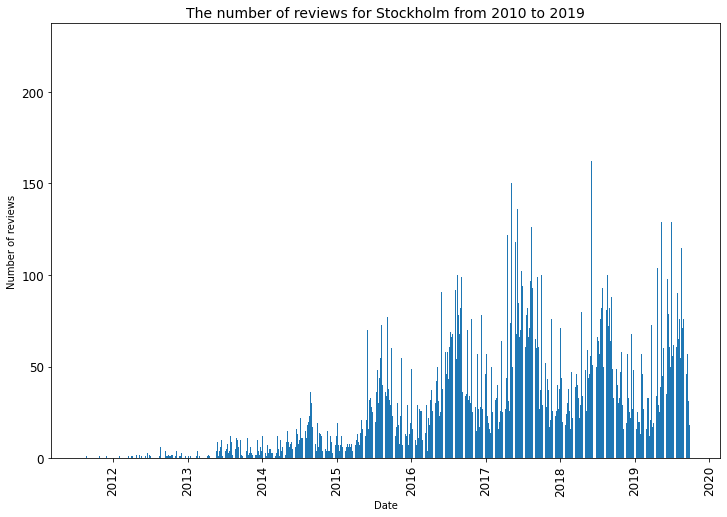

In [ ]:
# Making bar chart
date_reviews = df_reviews_stockholm.groupby('date').agg(F.count('date')).sort(col("date").desc()).toPandas()

# Making bar chart of reviews over time
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()
ax.bar(date_reviews.date, date_reviews['count(date)'])
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_title("The number of reviews for Stockholm from 2010 to 2019", fontsize = 14);
ax.set_xlabel("Date") 
ax.set_ylabel("Number of reviews")

**Answer:** From the bar chart it is apparent that over time Stockholm has become a more popular place to rent an airbnb place. It shows that there are most reviews done during the summer over all years. 

Compute and visualize the popularity of neighbourhoods over time. If there are many neighbourhoods in your city, you should select a few interesting ones for comparison. Can you identify any trends or differences? Summarise your findings.

In [ ]:
# Looking at the popularity of the different neighbourhoods
date = df_reviews_stockholm.groupby('neighbourhood_cleansed').agg(F.count('date')).sort(col('count(date)').desc()).show()

+----------------------+-----------+
|neighbourhood_cleansed|count(date)|
+----------------------+-----------+
|            södermalms|      33617|
|             norrmalms|      10330|
|          kungsholmens|       9353|
|            östermalms|       7452|
|  hägersten-liljeho...|       6080|
|  enskede-årsta-van...|       4281|
|            skarpnäcks|       2849|
|                bromma|       2323|
|                farsta|       1374|
|        rinkeby-tensta|       1310|
|           skärholmens|       1145|
|                älvsjö|        688|
|    hässelby-vällingby|        454|
|         spånga-tensta|        313|
|                pierce|         85|
+----------------------+-----------+



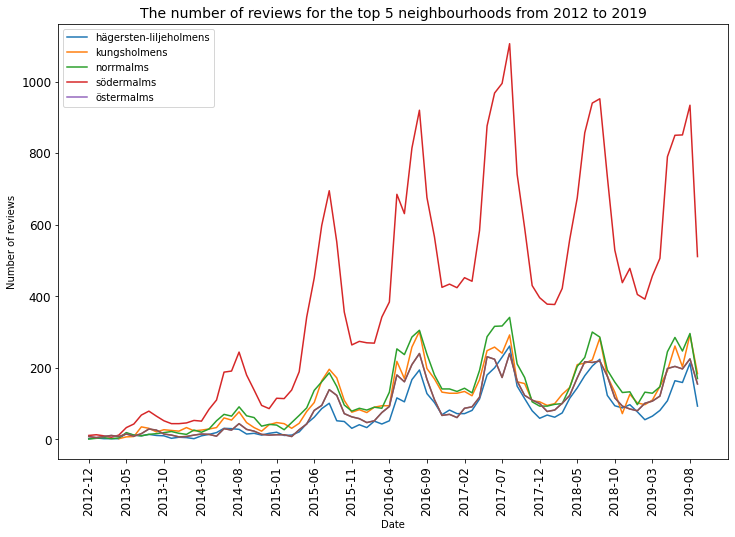

In [ ]:
# Using only the 5 most popular 
df_reviews_neigh = df_reviews_stockholm.filter((F.col('neighbourhood_cleansed') =='södermalms') | (F.col('neighbourhood_cleansed') == 'norrmalms') \
|(F.col('neighbourhood_cleansed') == 'östermalms')|(F.col('neighbourhood_cleansed') == 'kungsholmens') | (F.col('neighbourhood_cleansed') == 'hägersten-liljeholmens'))

# Changing the date to only contain the months and year, to get a smoother curve 
df_reviews_neigh = df_reviews_neigh.withColumn('date',date_format(col('date'),"yyyy-MM"))
# (F.col('date')>"2012-05")
# Grouping the dates in the different neighbourhoods, removing dates that cannot be sorted 
neigh = df_reviews_neigh.filter(F.col("date") > F.lit('2012-11')) \
.groupby('date','neighbourhood_cleansed').agg(F.count('date')).sort(col('date').asc()).toPandas()

# Plotting the popularity of the neighbourhoods over time 
fig = plt.figure(figsize = (12, 8)) 
ax = fig.add_subplot()
for neighbourhood_cleansed, neighbour in neigh.groupby("neighbourhood_cleansed"): 
    plt.plot(neighbour["date"], neighbour["count(date)"], label=neighbourhood_cleansed)

import matplotlib.ticker as mticker

# Making plot
plt.legend(loc='best')
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_title("The number of reviews for the top 5 neighbourhoods from 2012 to 2019", fontsize = 14);
ax.set_xlabel("Date") 
ax.set_ylabel("Number of reviews")
ax.set_xticks(ax.get_xticks()[::5])
ax.plot(neighbour["date"],neighbour["count(date)"])

**Answer:**
We choose the five most popular neighbourboods to study. From the plot it is clear that from 2011 to 2016 there was an increasing interest in visiting all the neighbourhoods. All the neighbourhoods increased the same, except Södermalm which had a higher number of reviews. After 2016 the number of reviews remained almost the same each summer.

Compute and visualize the popularity of your city by season. For example, visualize the popularity of your city per month. Are there seasonal trends? Describe your findings in words.

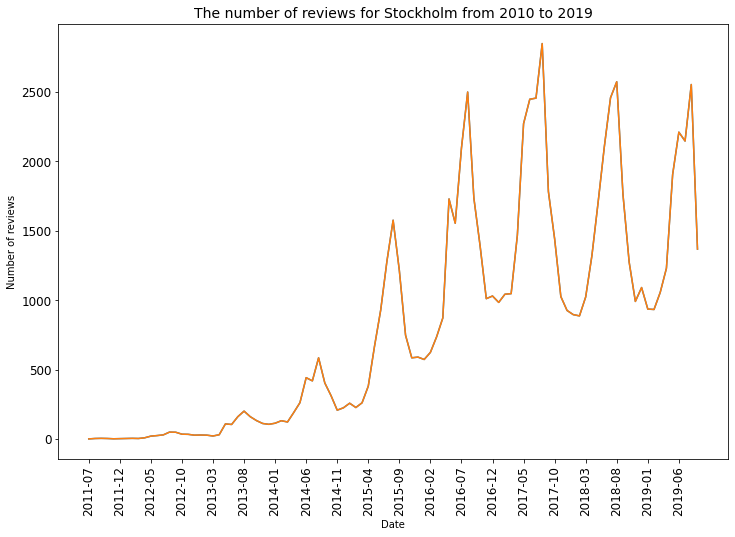

In [ ]:
# Chaning the datetime format so the day is removed from Stockholms date 
df_reviews_stockholm = df_reviews_stockholm.withColumn('date',date_format(col('date'),"yyyy-MM"))
date_reviews = df_reviews_stockholm.groupby('date').agg(F.count('date')).sort(col("date").asc()).toPandas()

# Plotting the reviews over time
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()
plt.plot(date_reviews.date, date_reviews['count(date)'])
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_title("The number of reviews for Stockholm from 2010 to 2019", fontsize = 14);
ax.set_xlabel("Date") 
ax.set_ylabel("Number of reviews")
ax.set_xticks(ax.get_xticks()[::5])
ax.plot(date_reviews["date"],date_reviews["count(date)"])

**Answer:**
As in the plot above, when looking at the monthly number of review there is an increasing number of reviews for Stockholm. It is clear that in the summer time there are most reviews, which would also be expected. 

<font color='green'>**TA Comment**: You don't clearly show the seasonal trend, when you plot over the entire timeline. I would have liked to see the 12 different months on the x-axis or perhaps the different quarters. -2 pts.

### 2.4. Reviews (20 pts)
In this part you should determine which words used in reviews are the most positive. More specifically, you should assign a "positivity score" to each word seen in reviews and list the words with the highest score. 

The individual reviews do not have a rating of the listing, so we will assume that each review gave the average rating to the listing, i.e., the one on the listing.

It is up to you to decide what the score should be. For example, it could be a function of the rating on the listing on which it occurs, the number of reviews it occurs in, and the number of unique listings for which it was used. 

Your positivity scores should be sensible. Words such as "clean", "comfortable", "superhost", etc., should get high scores, while words such as "unpleasant", "dirty", "scam" should get low scores.

Depending on your choice of scoring function, you may also want to do some filtering of words. For example, remove words that only occur in a few reviews. 

You have to: 

* Define your scoring function, mathematically and in code, and describe it in words.
* Compute scores for all words.
* List the 10 words with highest and lowest score.

**Answer:**
A ridge regression model is used to predict the rating of each word
$$
\mathbf{\hat{y}}=\mathbf{X}\hat{\beta}_{ridge} ,
$$

where the paramter is given by
$$
\hat{\beta}_{ridge}=(\mathbf{X}^T\mathbf{X}+\lambda \mathbf{I})^{-1} \mathbf{X}^T\mathbf{y} .
$$

It is determined in a 2-fold cross-validation with a grid-search over $\lambda$. Moreover, $\mathbf{\hat{y}}$ is the predicted rating and $\mathbf{X}$ is a matrix of normalized $TFIDF(t,d,D)$ for the comments. 

To obtain the matrix of normalized $TFIDF(t,d,D)$, all rows with no comment is first dropped. Afterwards all letters in the column "comments" are casted to lower level and normal signs and digits are removed. Each comment is then tokenized, which means the comments are boken into words. Common stopwords, extra spacing, and the word "stockholm" is then removed, whereupon all unique words are counted in each comment. This is known as term frequency, $TF(t,d)$, and is the number of times the term, $t$, appears in a document, $d$. Infrequent words are removed, such that a word must be in at least 3% of all documents to be included. The document frequency, $DF(t,D)$, is then defined, which is the number of documents, $D$, that contains a term, $t$. It is then possible to determine the inverse document frequency

$$
IDF(t,D)=\log \frac{|D|+1}{DF(t,D)+1} ,
$$
where $|D|$ is the total number of documents. $IDF(t,D)$ is a measure of how much information each term provides and as words with a high frequency carry little information, they will have a low $IDF(t,D)$. The term frequency, inverse document frequency is the computed

$$
TFIDF(t,d,D)=TF(t,d)\cdot IDF(t,D) .
$$

Finally all comments are normalized, such that all comments are weigthed equally. The $\mathbf{X}$ matrix is now obtained, and the ridge regression model is trained to predict the rating. The vocabulary with normalized $TFIDF(t,d,D)$ is finally transformed to obtain a score. 

**Comment to the training**

Due to issues with training time on the complete data, the data has been downsized to train on a subset of size 20000 

In [ ]:
# Using only a subset of data 
df_sub = df_reviews_stockholm.limit(20000)

# Dropping all rows with no comment
df_sub = (df_sub.na.drop(subset=["comments"]))

# Casting upper level letters to lower level letters
df_sub = df_sub.withColumn("comments", F.lower(F.col('comments')))

# Removing signs and numbers
df_sub = df_sub.withColumn("comments", F.regexp_replace(F.col("comments"),"[\$-_,;.:!?’'`´1234567890]", ""))

In [ ]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover, CountVectorizer, IDF, Normalizer

# Breaking the comments into words
tokenizer = Tokenizer(inputCol="comments", outputCol="words")
df_tokenized = tokenizer.transform(df_sub)

# Removing stopwords (common words)
stop_words = StopWordsRemover.loadDefaultStopWords("english")
stop_words = stop_words+(["stockholm",""," ",])
remover = StopWordsRemover(inputCol="words", outputCol="filtered", stopWords=stop_words)
df_removed = remover.transform(df_tokenized)

# Count words in each comment to create feature vectors (term frequency, TF)
count_vec = CountVectorizer(inputCol="filtered", outputCol="rawFeatures", minDF=0.03)
tfModel = count_vec.fit(df_removed)
df_featurized = tfModel.transform(df_removed)

# Rescale the feature vectors (inverse document frequency, IDF)
idf = IDF(inputCol="rawFeatures", outputCol="features")
idfModel = idf.fit(df_featurized)
df_rescaled = idfModel.transform(df_featurized)

# Normalize for each rating, so the length of the comment is non-determining
normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
df_normalized = normalizer.transform(df_rescaled)

In [ ]:
# Making vocabulary to dataframe to make score of each word
vocab = tfModel.vocabulary
df_vocab = spark.createDataFrame([[word] for word in vocab], 
                                 ArrayType(StringType())).toDF('filtered')

df_vocabTF = tfModel.transform(df_vocab)
df_vocabIDF = idfModel.transform(df_vocabTF)
df_vocabNorm = normalizer.transform(df_vocabIDF)

In [ ]:
# Selecting columns to build model from and drop rows with no words
df_model = df_rescaled.selectExpr('review_scores_rating as label','features','filtered as words')
df_model = df_model.withColumn('label', F.col('label').cast(IntegerType()))
df_model = df_model.na.drop(subset=["features"])

In [ ]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

# Selecting columns to build model from and drop rows with no words
df_for_model = df_rescaled.selectExpr('review_scores_rating as label','features','filtered as words')
df_for_model = df_for_model.withColumn('label', F.col('label').cast(IntegerType()))
df_for_model = df_for_model.na.drop(subset=["features"])

# Prepare Ridge regression (using alpha=elasticNetParam=0)
ridge = LinearRegression(maxIter=10, elasticNetParam=0)

# Grid to search for optimal value of lambda
paramGrid = ParamGridBuilder().addGrid(ridge.regParam, [0.1, 0.01]).build()

# 10-fold cross-validation
crossval = CrossValidator(estimator=ridge,
                          estimatorParamMaps=paramGrid,
                          evaluator=RegressionEvaluator(),
                          numFolds=2)

# Cross-validation and Ridge regression on traiing data to find the best set of parameters.
cvModel = crossval.fit(df_for_model)

In [ ]:
# Compute scores of all words
results = cvModel.transform(df_vocabNorm).select('filtered','normFeatures','prediction')

In [ ]:
# The five words with highest score
results.orderBy('prediction',ascending=False).show(5)

+-----------+-----------------+-----------------+
|   filtered|     normFeatures|       prediction|
+-----------+-----------------+-----------------+
|   [family]|(157,[125],[1.0])|94.76399666105192|
|     [tips]|(157,[146],[1.0])|94.48359616326385|
| [spacious]| (157,[78],[1.0])| 94.3200082514031|
|   [highly]| (157,[37],[1.0])| 94.3113745095812|
|[fantastic]|(157,[126],[1.0])| 94.2995341939465|
+-----------+-----------------+-----------------+
only showing top 5 rows



In [ ]:
# The five words with lowest score
results.orderBy('prediction',ascending=True).show(5)

+----------+-----------------+-----------------+
|  filtered|     normFeatures|       prediction|
+----------+-----------------+-----------------+
|   [peter]|(157,[109],[1.0])|88.01963819662201|
|   [didnt]|(157,[124],[1.0])| 93.1454534839045|
|  [people]|(157,[111],[1.0])|93.17827240701018|
|[bathroom]| (157,[75],[1.0])|93.17941588054903|
|   [gamla]|(157,[135],[1.0])| 93.1804305036639|
+----------+-----------------+-----------------+
only showing top 5 rows



# Exercise 2: sales & profit analysis (52.5 points)


## Introduction


<img src="https://www.lifeandstylemag.com/wp-content/uploads/2018/01/kevin-malone-the-office.jpg?resize=630%2C354" alt="kevin" width="600"/> 

*Kevin from accounting*



Your team has been hired by the company X as data scientists. X makes gadgets for a wide range of industrial and commercial clients.

As in-house data scientists, your teams first task, as per request from your new boss, is to optimize business operations. You have decided that a good first step would be to analyze the company's historical sales data to gain a better understanding of where profit is coming from. It may also reveal some low hanging fruit in terms of business opportunities.

To get started, you have called the IT department to get access to the customer and sales transactions database. To your horror you've been told that such a database doesn't exist, and the only record of sales transactions is kept by Kevin from accounting in an Excel spreadsheet. So you've emailed Kevin asking for a CSV dump of the spreadsheet...

In this project you need to clean the data you got from Kevin, enrich it with further data, prepare a database for the data, and do some data analysis. The project is comprised of five parts. They are intended to be solved in the order they appear, but it is highly recommended that you read through all of them and devise an overall strategy before you start implementing anything.


## Part 1: Cleaning the data (10 pts)
Kevin has emailed you the following link to the CSV dump you requested.

- [transactions.csv](http://courses.compute.dtu.dk/02807/2020/projects/project2/transactions.csv)

It seems as though he has been a bit sloppy when keeping the records. 

In this part you should:
1. Explain what the data is about
2. Inspect and clean it to prepare it for analysis. Describe the problems you found in the data, and how you addressed them.

In [2]:
# Import packages for this exercise 
!pip install pyspark
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import *
from pyspark.sql import functions as f
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf
import pandas as pd
from google.colab import drive
from pyspark.sql.functions import to_timestamp
from pyspark.sql.functions import col, unix_timestamp, to_date
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import from_unixtime
import pyspark.sql.functions as F
from pyspark.sql.functions import col, expr, when
import numpy as np
# mount drive 
drive.mount('/content/drive')

openjdk-8-jdk-headless is already the newest version (8u275-b01-0ubuntu1~18.04).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Mounted at /content/drive


**Explain what the data is about**

In [3]:
# load the data transactions as spark with the predefined schema that is fitted for each column 
transactionSchema = StructType([StructField('part', StringType(),True),
                                  StructField('company', StringType(), True),
                                  StructField('country', StringType(), True),
                                  StructField('city', StringType(), True),
                                  StructField('price', StringType(), True),
                                  StructField('date', TimestampType(), True)])
transactions_sp = spark.read.csv('/content/drive/My Drive/transactions.csv', header=True, schema=transactionSchema)


In [4]:
# show part of the data
transactions_sp.show(5)

+----------+-------------+-------+------------+--------+-------------------+
|      part|      company|country|        city|   price|               date|
+----------+-------------+-------+------------+--------+-------------------+
|54868-5165|Chatterbridge|  Spain|   Barcelona| 784.79€|2016-01-02 00:01:05|
|60505-2867|         Lajo| Greece|Thessaloniki| 187.99€|2016-01-02 00:05:26|
| 24385-268|    Flipstorm| Greece|      Athens| 221.73€|2016-01-02 00:18:30|
| 76117-001|  Twitterbeat| France|      Annecy|1075.82€|2016-01-02 02:32:30|
|44946-1046|Chatterbridge|  Spain|   Barcelona| 412.55€|2016-01-02 04:51:55|
+----------+-------------+-------+------------+--------+-------------------+
only showing top 5 rows



In [5]:
# number of rows
print('The data contains '+ str(transactions_sp.count())+' rows')

The data contains 20568 rows


In [6]:
# Printing the schema of each column and see associated types
transactions_sp.printSchema()

root
 |-- part: string (nullable = true)
 |-- company: string (nullable = true)
 |-- country: string (nullable = true)
 |-- city: string (nullable = true)
 |-- price: string (nullable = true)
 |-- date: timestamp (nullable = true)



In [7]:
transactions_sp.select(F.countDistinct("company")).show()

+-----------------------+
|count(DISTINCT company)|
+-----------------------+
|                     35|
+-----------------------+



In [8]:
temp_c_filt=transactions_sp.select('country','city','company').groupby('country','city',).agg(f.count('company').alias('number_of_companies'))
df2 = temp_c_filt.dropna(thresh=2,subset=('country','city'))
# removing typing errors or inconsistancy in country column:
newDf = (df2
         .withColumn('country', regexp_replace('country', 'Tyskland', 'Germany'))
         .withColumn('country', regexp_replace('country', 'US', 'United States'))
         .withColumn('country', regexp_replace('country', 'Portuga', 'Portugal'))
         .withColumn('country', regexp_replace('country', 'll', 'l'))
         .withColumn('country', regexp_replace('country', '	',''))
         .sort(col('country'),col('city')))
filteredCountryCity=newDf.drop_duplicates(subset=['city']).drop('number_of_companies')
filteredCountryCity.show(30)

+--------------+------------+
|       country|        city|
+--------------+------------+
|        Greece|Thessaloniki|
|      Portugal|      Monção|
|        France|        Nice|
|      Portugal|       Braga|
|      Portugal|      Lisbon|
|United Kingdom|      London|
|      Portugal|   Vila Fria|
|       Germany|  Düsseldorf|
|        France|       Paris|
|        Greece|      Athens|
|        France|        Lyon|
|   Netherlands|      Arnhem|
|      Portugal|       Porto|
|        Greece|   Heraklion|
|        France| Champagnole|
|         Spain|   Barcelona|
|        France|     Arcueil|
|        France|      Annecy|
|   Netherlands|   Amsterdam|
|      Portugal|      Almada|
|         Japan|     Niihama|
|      Portugal|    Amadora	|
|         Japan|       Asaka|
|        France|    Nanterre|
|        Greece|      Patras|
|   Switzerland|      Zürich|
| United States|    New York|
|      Portugal|     Aranhas|
|        France|      Amiens|
| United States|      Boston|
+---------

In [9]:
temp_comp=transactions_sp.select('country','company','city').groupby('company','city','country').agg(f.count('company').alias('number_of_companies')).dropna(thresh=2,subset=('country','city'))
df3 = (temp_comp.withColumn('company', regexp_replace('company', 'Zooxo.', ' Zooxo'))
         .withColumn('company', regexp_replace('company', 'Laj0', 'Lajo'))
         .withColumn('company', regexp_replace('company', 'Thoughtmixz', 'Thoughtmix'))
         .withColumn('company', regexp_replace('company', 'Ntagz','Ntags'))
         .withColumn('company', regexp_replace('company', 'Gabtune','Gabcube'))
         .withColumn('country', regexp_replace('country', 'Tyskland', 'Germany'))
         .withColumn('country', regexp_replace('country', 'US', 'United States'))
         .withColumn('country', regexp_replace('country', 'Portuga', 'Portugal'))
         .withColumn('country', regexp_replace('country', 'll', 'l'))
         .withColumn('country', regexp_replace('country', '	',''))
         .dropDuplicates(subset=['company']))
templateCompany=df3.sort(col('company')).drop('number_of_companies').withColumnRenamed('country','country_').withColumnRenamed('city','city_')
templateCompany.show(templateCompany.count())

+-------------+------------+--------------+
|      company|       city_|      country_|
+-------------+------------+--------------+
|            -|      Boston| United States|
|        Zooxo|      London|United Kingdom|
|            a|    New York| United States|
|       Avaveo|        Nice|        France|
|  Brainsphere|       Braga|      Portugal|
|    Bubblemix|       Asaka|         Japan|
|     Buzzbean|  Düsseldorf|       Germany|
|Chatterbridge|   Barcelona|         Spain|
|       Eimbee|      Amiens|        France|
|    Flipstorm|      Athens|        Greece|
|      Gabcube|        Lyon|        France|
|        Gevee| Champagnole|        France|
|      Innojam|   Amsterdam|   Netherlands|
|     Kanoodle|     Niihama|         Japan|
|         Lajo|Thessaloniki|        Greece|
|        Ntags|      Lisbon|      Portugal|
|    Realpoint|      Lisbon|      Portugal|
|      Rhycero|     Arcueil|        France|
|     Riffpath|   Heraklion|        Greece|
|       Roodel|     Aranhas|    

In [10]:
# number of different companies that are customers in this firm: 
print('There are '+ str(templateCompany.count()) +' customers')


There are 31 customers


In [11]:
# The company sells different parts 
transactions_sp.select(F.countDistinct("part")).show()

+--------------------+
|count(DISTINCT part)|
+--------------------+
|                 100|
+--------------------+



In [12]:
# data set distribution
print('There are ' + str( transactions_sp.filter(f.col('date').contains(2016)).count())+ ' transactions from 2016, ' +str(transactions_sp.filter(f.col('date').contains(2017)).count())+' transactions from 2017 ' + 
     str(transactions_sp.filter(f.col('date').contains(2018)).count())+ ' transactions from 2018 and ' + str(transactions_sp.filter(f.col('date').contains(2019)).count()) +' transactions from 2019' )

There are 7556 transactions from 2016, 6544 transactions from 2017 6457 transactions from 2018 and 2 transactions from 2019


**Description of data**

The data contains sales transactions, as the company is making gadgets for different clients, we see in first column that "**part**" contains information about the product, "**company**" is the customer who has purchased product.
There are **different companies** that has purchased parts at this firm. 
"**country**" & "**city**" gives information about location of the "**company**". "**price**" is how much the product costs and "**date**" is the date/time of purchase. 
The data is collected from 2016 to mainly 2018 with 2 transactions from 2019. 

**Findings during inspection:**

As we can see in the table of countries and number of companies, there are some typing errors / not uniform definition of country names:
* Portugal = Portuga
* Tyskland = Germany
* United states = US 
* Some countries are null
* some cities are null 
* both cities and countries are nul

Issue with all transactions does not have common currencies 
* US dollar
* Pound
* Yan
* Euros 


In [ ]:
# example of how the countries are non - uniform
transactions_sp.select('country').distinct().collect()

[Row(country='Germany'),
 Row(country='France'),
 Row(country='Greece'),
 Row(country=None),
 Row(country='United States'),
 Row(country='Portuga'),
 Row(country='Spain'),
 Row(country='US'),
 Row(country='Switzerland'),
 Row(country='Japan'),
 Row(country='Portugal'),
 Row(country='United Kingdom'),
 Row(country='Netherlands'),
 Row(country='Tyskland')]

**Cleaning the data**

The purpose of cleaning data is to remove corrupt data, or missing values. In some cases the data does not have to be removed if it can be corrected. In our case we have chosen to discar missing values as we have no further information about what null values should be replaced with. 

* original data has some time stamps where the time is not noted, by using a predefined schema (when loadning the data)so values within date column gets clock 00:00:00 if nothing else is assigned.
*  small errors and spaces removed done by using withColumn combined with regexp_replace 
*  cases where city is present and missing country is filtered by taking unique city and countries in the data set to make a template that is saved in the data frame filteredCountryCity, where it is a list of which cities belongs to which country. This can be joined with the original data where new column with all countries fill out by this template.
* Cases where only the company is present and both city and country is null can be filtered using same method (join and a template) templateCompany is a dataframe with company and the city and country they belongs to.
* Currency problem is solved by making a new column containing all prices converted to Euros





In [13]:
# Define a function to remove the non ascii characters €, $ 
from pyspark.sql.functions import udf

def ascii_ignore(x):
    return x.encode('ascii', 'ignore').decode('ascii')

ascii_udf = udf(ascii_ignore)

In [14]:
# instead of having price = 187.26€ we are interested in having two columns 
# currency EUR 
# price 187.26 
# and one more column with price in EUR for later comparison 
new_column_1 = (when(col("price").contains('$'),'USD')
                .when(col("price").contains('€'),'EUR')
                .when(col("price").contains('£'),'GBP')
                .when(col("price").contains('¥'),'JPY'))
# define rates 
jpy_To_eur=0.008
gbp_To_eur=1.12
usd_To_eur=0.85
priceEURw = (when(col("currency").contains('USD'),f.col('value')*usd_To_eur)
                .when(col("currency").contains('EUR'),f.col('value'))
                .when(col("currency").contains('GBP'),f.col('value')*gbp_To_eur)
                .when(col("currency").contains('JPY'),f.col('value')*jpy_To_eur))


# after investigation previously there are some typing error and minor changes that easily can be corrected by regexp_replace
# there are futher more added new ones for company
country_filtered = (transactions_sp.withColumn('country', regexp_replace('country', 'Tyskland', 'Germany'))
         .withColumn('country', regexp_replace('country', 'US', 'United States'))
         .withColumn('country', regexp_replace('country', 'Portuga', 'Portugal'))
         .withColumn('country', regexp_replace('country', 'll', 'l'))
         .withColumn('country', regexp_replace('country', '	',''))
         .withColumn('company', regexp_replace('company', 'Zooxo.', ' Zooxo'))
         .withColumn('company', regexp_replace('company', 'Laj0', 'Lajo'))
         .withColumn('company', regexp_replace('company', 'Thoughtmixz', 'Thoughtmix'))
         .withColumn('company', regexp_replace('company', 'Ntagz','Ntags'))
         .withColumn('company', regexp_replace('company', 'Gabtune','Gabcube')))
# use the filterede country city dataframe to filter the missing values of countries when city is present
# this is done by using left join
filtered= country_filtered.join(filteredCountryCity.withColumnRenamed('country','cc'), "city", "left")
doneFilter = filtered.join(templateCompany,'company','left')

noNan_transactions=doneFilter.na.drop() 

currencyTran=(noNan_transactions
              .withColumn("currency", new_column_1)
              .withColumn("value", ascii_udf('price'))
              .withColumn("priceEUR", priceEURw)
              .withColumn("value", F.col("value").astype(IntegerType()))
              .withColumn("priceEUR", F.col("priceEUR").astype(IntegerType()))
              )

# Converted price - > currency + value and convert value to interger in order to plot later '
_filtered_= currencyTran.drop('country').drop('city').drop('cc').drop('price').na.drop()
# Dropping some columns
TransactionData =_filtered_.withColumnRenamed('city_','city').withColumnRenamed('country_','country').na.drop() 
# priceEUR column contains prices in euro 
TransactionData.show()
TransactionData.printSchema()

+-------------+----------+-------------------+------------+--------------+--------+-----+--------+
|      company|      part|               date|        city|       country|currency|value|priceEUR|
+-------------+----------+-------------------+------------+--------------+--------+-----+--------+
|Chatterbridge|54868-5165|2016-01-02 00:01:05|   Barcelona|         Spain|     EUR|  784|     784|
|         Lajo|60505-2867|2016-01-02 00:05:26|Thessaloniki|        Greece|     EUR|  187|     187|
|    Flipstorm| 24385-268|2016-01-02 00:18:30|      Athens|        Greece|     EUR|  221|     221|
|  Twitterbeat| 76117-001|2016-01-02 02:32:30|      Annecy|        France|     EUR| 1075|    1075|
|Chatterbridge|44946-1046|2016-01-02 04:51:55|   Barcelona|         Spain|     EUR|  412|     412|
|Chatterbridge| 16729-167|2016-01-02 07:20:59|   Barcelona|         Spain|     EUR|  359|     359|
|        Voomm| 52125-444|2016-01-02 07:40:37|       Paris|        France|     EUR|  266|     266|
|     Buzz

**Text to the dataset**

From now on, the data processing will be performed on the dataframe "TransactionData"

## Part 2: Analyzing the data (32.5 pts)
You are now ready to analyze the data. Your goal is to gain some actionable business insights to present to your boss. 

In this part, you should ask some questions and try to answer them based on the data. You should write SQL queries to retrieve the data for at least 3 out of the 6 parts below (2.1,..., 2.6). The remaining ones must be done with Spark functions). 

As you start to look into the questions, you'll realise that you need to enrich your data. For example: transaction prices are recorded in the local currency of the client (EUR, GBP, USD or JPY). You will need to convert these prices from local currency into a common currency such as EUR, for comparability. Describe the enrichments, as you perform them.

Remember, you are taking this to your new boss, so think about how you present the data. Include headers, legends and well-written descriptions for graphs/charts. Think of the solutions you provide as an "executive summary" of your findings. You should put an effort in presentation and writing, not just coding.




### Who are the most profitable clients? (20 pts)

Knowing which clients that generate the most revenue for the company will assist your boss in distributing customer service ressources. Answer the following questions and provide appropriate visualisations for each of them. As mentioned before, include headers, legends and well-written descriptions for graphs/charts.


#### 2.1. How much revenue has each customer generated? (2.5 pts)

Compute and plot how much revenue each customer has generated over the three-year period. Write a paragraph describing the findings.


In [16]:
# in order to run SQL create temp data
TransactionData.createOrReplaceTempView("TransactionData")
# SQL to make group by of the prices. 
q = """
  SELECT 
    company, COUNT(priceEUR) AS numberOfTransactions, AVG(priceEUR) AS avgPricePrTransaction, 
    SUM(priceEUR) AS totalRevenue, MAX(priceEUR) AS maxPricePrTransaction
  FROM 
    TransactionData
  GROUP BY company
  ORDER BY SUM(priceEUR) DESC
    """
gp_transaction=spark.sql(q) 
gp_transaction.show()

+-------------+--------------------+---------------------+------------+---------------------+
|      company|numberOfTransactions|avgPricePrTransaction|totalRevenue|maxPricePrTransaction|
+-------------+--------------------+---------------------+------------+---------------------+
|   Thoughtmix|                2506|      580.40263367917|     1454489|                 2174|
|  Twitterbeat|                2034|    579.0644051130777|     1177817|                 2035|
|        Zooxo|                1509|    573.4777998674618|      865378|                 1684|
|Chatterbridge|                1423|    578.0632466619817|      822584|                 1813|
|  Shufflebeat|                1380|    593.1920289855072|      818605|                 1791|
|        Ntags|                1352|               556.75|      752726|                 2140|
|     Buzzbean|                1123|    572.3659839715049|      642767|                 1700|
|  Brainsphere|                1114|    575.8554757630161|  

Text(0, 0.5, 'Revenue in EUR')

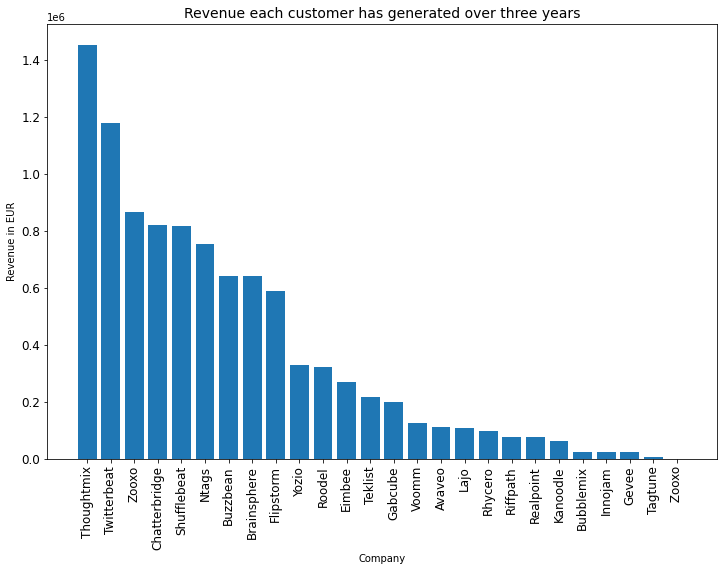

In [ ]:
## convert to pandas and plot
# fill null values with 0 
groupedTrasaction_ = gp_transaction.fillna(0)
# convert to pandas for plotting
pd_groupedTrasaction = groupedTrasaction_.toPandas()
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()
ax.bar(pd_groupedTrasaction.company, pd_groupedTrasaction.totalRevenue)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.set_title("Revenue each customer has generated over three years", fontsize = 14);
ax.set_xlabel("Company") 
ax.set_ylabel("Revenue in EUR")

**Figure text**

This is a bar char of each costumer and the total revenue generated by each of them. The company names are in the x-asix. The most profitable client is thoughtmix and they have generated over 1.4 million euros revenue over the period from 2016 to 2018. 
The full overview of the revenue is saved in the dataframe gp_transaction


#### 2.2. What are the top 5 most revenue-generating customers? (7.5 pts)

Identify your best 5 customers. 


In [ ]:
# SQL
# Making sure it is runable in the SQL 
groupedTrasaction_.createOrReplaceTempView("groupedTrasaction_")
# select column and select top five using LIMIT in SQL 
q = """
    SELECT company
    FROM groupedTrasaction_ 
    LIMIT 5
    """
spark.sql(q).show()

+-------------+
|      company|
+-------------+
|   Thoughtmix|
|  Twitterbeat|
|        Zooxo|
|Chatterbridge|
|  Shufflebeat|
+-------------+



**Answer:**

The top most revenue generating customers are, the prices in the column "totalRevenue" is in EUR


1.   Thoughtmix

2.   Twitterbeat

3.   Zooxo

4.   Chatterbridge 

5.   Shufflebeat


Are the most revenue-generating customers making particularly large purchase orders? 

Compute the answer, plot appropriately, and write a paragraph describing the findings.

In [ ]:
# the dataframe shows the maximum price per order, 
# for those companies that generates most revenue
q = """
    SELECT company, maxPricePrTransaction
    FROM groupedTrasaction_ 
    LIMIT 5
    """
spark.sql(q).show()

Top_comp_5 = spark.sql(q) 

+-------------+---------------------+
|      company|maxPricePrTransaction|
+-------------+---------------------+
|   Thoughtmix|                 2174|
|  Twitterbeat|                 2035|
|        Zooxo|                 1684|
|Chatterbridge|                 1813|
|  Shufflebeat|                 1791|
+-------------+---------------------+



Text(0, 0.5, 'Price in EUR')

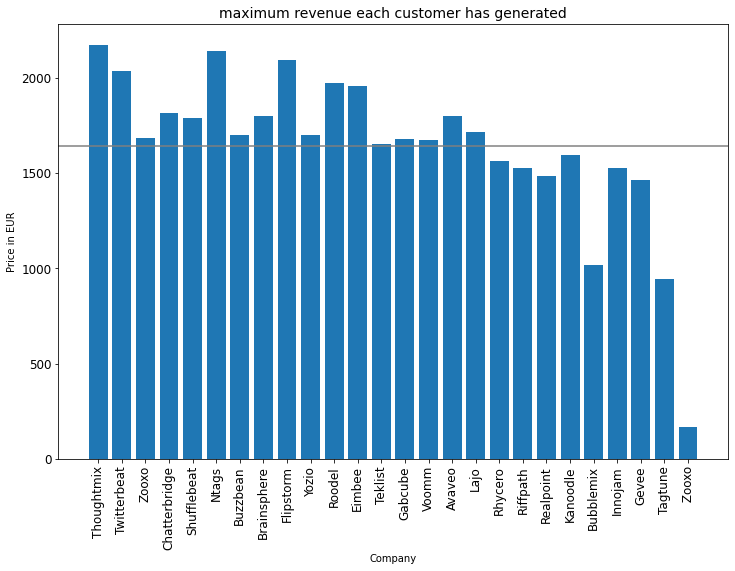

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()
ax.bar(pd_groupedTrasaction.company, pd_groupedTrasaction.maxPricePrTransaction)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.axhline(pd_groupedTrasaction.maxPricePrTransaction.mean(), color="gray")
ax.set_title("maximum revenue each customer has generated", fontsize = 14);
ax.set_xlabel("Company") 
ax.set_ylabel("Price in EUR")

In [ ]:
print("The average maximum price pr transaction is: "+ str(pd_groupedTrasaction.maxPricePrTransaction.mean()) )

The average maximum price pr transaction is: 1640.7692307692307


**Answer:** 

As we can see in the bar chart of all the companies and their maximum purchases.The grey line is the average of maximum purchase price in EUR. As we can see the top five companies is above the average purchase orders.  

Are they making a lot of purchases? 

Compute the answer, plot appropriately, and write a paragraph describing the findings.


In [ ]:
# sql to check the number of transactions
q = """
    SELECT company, numberOfTransactions
    FROM groupedTrasaction_ 
    LIMIT 5
    """
spark.sql(q).show()

+-------------+--------------------+
|      company|numberOfTransactions|
+-------------+--------------------+
|   Thoughtmix|                2506|
|  Twitterbeat|                2034|
|        Zooxo|                1509|
|Chatterbridge|                1423|
|  Shufflebeat|                1380|
+-------------+--------------------+



Text(0, 0.5, 'Number')

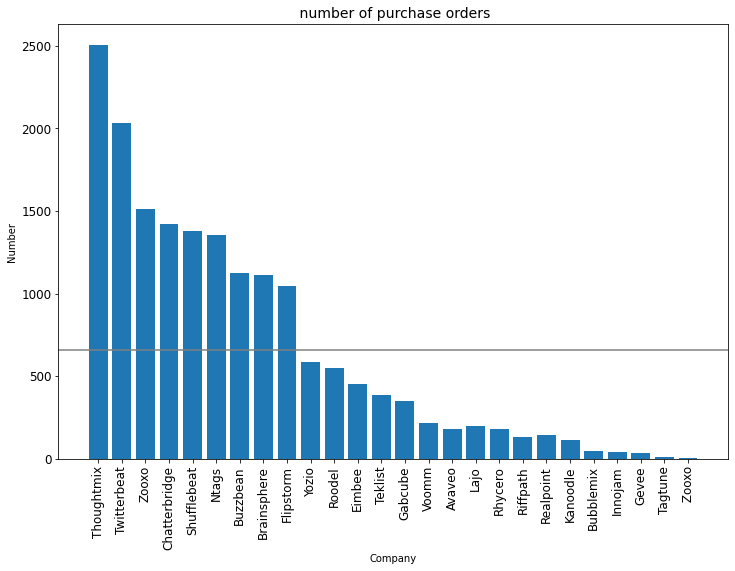

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax = fig.add_subplot()
ax.bar(pd_groupedTrasaction.company, pd_groupedTrasaction.numberOfTransactions)
ax.tick_params(axis = 'x', labelrotation = 90, labelsize = 12)
ax.tick_params(axis = 'y', labelsize = 12)
ax.axhline(pd_groupedTrasaction.numberOfTransactions.mean(), color="gray")
ax.set_title(" number of purchase orders", fontsize = 14);
ax.set_xlabel("Company") 
ax.set_ylabel("Number")

In [ ]:
print("The average number transaction pr company is: "+ str(pd_groupedTrasaction.numberOfTransactions.mean()) )

The average number transaction pr company is: 657.9230769230769


**Answer:**

The top 5 companies are also the ones that have most number of transactions as shown in the barplot. The plot includes a line that indicates where the mean number of purchase. As we can see 9 companies are above average including the top 5 companies. This bar plot also reveals the same trend as the plot of total renevenu, which indicates that the companies that have purchased many orders are same ones that have many orders.


#### 2.3. Which parts have become more popular lately, also which are becoming less popular? (5 pts)

Improving stock turnover is important to a company. Large quantites of a product that don't sell will bring no revenue to the company as well as storage costs. Too few parts of a popular item may lead to possibly lost sales as they risk being sold out.

Compute the answer, plot appropriately, and write a paragraph describing the findings.

In [ ]:
# Number of sold items and item ID
# the distinct parts in sql 
spark.sql("SELECT COUNT(DISTINCT(part)) AS number_of_items FROM TransactionData").show()
# There's 100 different products sold in this company

+---------------+
|number_of_items|
+---------------+
|            100|
+---------------+



**Comment:**

As it shows the company sells 100 of different products

In [24]:
TransactionData.createOrReplaceTempView("TransactionData")
q = """
  SELECT 
    part, YEAR(date) AS year, MONTH(date) AS month, COUNT(part) AS num_sold 
  FROM 
    TransactionData
  GROUP BY part, date
  ORDER BY COUNT(part) DESC
    """
sortedPartData=spark.sql(q)
sortedPartData.createOrReplaceTempView("sortedPartData")

In [25]:
# Top 20 most sold items in 2019 
q = """
  SELECT 
    part , COUNT(part) AS Num_sold_item_2019
  FROM 
    sortedPartData
  WHERE 
    year = 2019  
  GROUP BY  part
  ORDER BY  Num_sold_item_2019 DESC
    """
topSold2019=spark.sql(q)


In [26]:
# Top 20 most sold items in 2018 
q = """
  SELECT 
    part , COUNT(part) AS Num_sold_item_2018
  FROM 
    sortedPartData
  WHERE 
    year = 2018  
  GROUP BY  part
  ORDER BY  Num_sold_item_2018 DESC
    """
topSold2018=spark.sql(q)


In [27]:
# Top 20 most sold items in 2017 
q = """
  SELECT 
    part , COUNT(part) AS Num_sold_item_2017
  FROM 
    sortedPartData
  WHERE 
    year = 2017  
  GROUP BY  part
  ORDER BY  Num_sold_item_2017 DESC
    """
topSold2017=spark.sql(q)

In [28]:

# Top 20 most sold items in 2016 
q = """
  SELECT 
    part , COUNT(part) AS Num_sold_item_2016
  FROM 
    sortedPartData
  WHERE 
    year = 2016 
  GROUP BY  part
  ORDER BY  Num_sold_item_2016 DESC
    """
topSold2016=spark.sql(q)

In [29]:
topSold2016.createOrReplaceTempView("topSold2016")
topSold2017.createOrReplaceTempView("topSold2017")
topSold2018.createOrReplaceTempView("topSold2018")
topSold2019.createOrReplaceTempView("topSold2019")

In [30]:
# full join of all sold overviews:
q = """
  SELECT 
    topSold2016.part, 
    topSold2016.Num_sold_item_2016, 
    topSold2017.Num_sold_item_2017, 
    topSold2018.Num_sold_item_2018, 
    topSold2019.Num_sold_item_2019, 
    (topSold2018.Num_sold_item_2018-topSold2017.Num_sold_item_2017)/topSold2017.Num_sold_item_2017 AS change_from_2017_to_2018,
    (topSold2017.Num_sold_item_2017-topSold2016.Num_sold_item_2016)/topSold2016.Num_sold_item_2016 AS change_from_2016_to_2017, 
    (topSold2018.Num_sold_item_2018-topSold2016.Num_sold_item_2016)/topSold2016.Num_sold_item_2016 AS change_from_2016_to_2018
  FROM 
    topSold2016
  FULL JOIN 
    topSold2017
  ON 
    topSold2016.part = topSold2017.part
  FULL JOIN 
    topSold2018
  ON 
    topSold2016.part = topSold2018.part
  FULL JOIN 
    topSold2019
  ON 
    topSold2016.part = topSold2019.part
  ORDER BY change_from_2016_to_2018 DESC  
    """
partSoldOverYears=spark.sql(q)
partSoldOverYears.createOrReplaceTempView("partSoldOverYears")

In [31]:
#the five most popular items over the years 
Top_sold_5 = spark.sql("SELECT * FROM partSoldOverYears ORDER BY change_from_2016_to_2018 DESC LIMIT 5")
Top_sold_5.show()

+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|      part|Num_sold_item_2016|Num_sold_item_2017|Num_sold_item_2018|Num_sold_item_2019|change_from_2017_to_2018|change_from_2016_to_2017|change_from_2016_to_2018|
+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|54868-0823|                50|                90|                98|              null|     0.08888888888888889|                     0.8|                    0.96|
|54868-6311|                34|                36|                57|              null|      0.5833333333333334|    0.058823529411764705|      0.6764705882352942|
| 55289-164|                40|                44|                67|              null|      0.5227272727272727|                     0.1|                   0.675|
| 62756-707|    

In [32]:
#the five least popular items over the years 
Bottom_sold_5 = spark.sql("SELECT * FROM partSoldOverYears ORDER BY change_from_2016_to_2018 ASC LIMIT 5")
Bottom_sold_5.show(5)

+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|      part|Num_sold_item_2016|Num_sold_item_2017|Num_sold_item_2018|Num_sold_item_2019|change_from_2017_to_2018|change_from_2016_to_2017|change_from_2016_to_2018|
+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
| 76454-100|                87|                65|                68|              null|    0.046153846153846156|    -0.25287356321839083|    -0.21839080459770116|
|55566-2100|                59|                50|                47|              null|                   -0.06|    -0.15254237288135594|     -0.2033898305084746|
|62011-0219|                86|                84|                69|              null|    -0.17857142857142858|    -0.02325581395348...|    -0.19767441860465115|
|55856-0003|    

**text to table**

Two tables are printed: Top_sold_5 and Bottom_sold_5. These tables includes the number of sold items pr year for each part. The values are sorted based on the column "change from 2016 to 2018" which is the relative change betweem Num_sold_item_2016 to Num_sold_item_2018.


$ RelativeChange = \frac{Number_{2018}-Number_{2016}}{ Number_{2016}}$


As we can see the observations from 2019 are not so interesting, as we have very few purchases in the data therefore we are only considering the years 2016 2017 and 2018

In [33]:
# fill null values with 0 
partSoldOverYears_ = partSoldOverYears.fillna(0)
# convert to pandas for plotting
pd_partSoldOverYears = partSoldOverYears_.toPandas()

In [34]:
partSoldOverYears_.show()

+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|      part|Num_sold_item_2016|Num_sold_item_2017|Num_sold_item_2018|Num_sold_item_2019|change_from_2017_to_2018|change_from_2016_to_2017|change_from_2016_to_2018|
+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|54868-0823|                50|                90|                98|                 0|     0.08888888888888889|                     0.8|                    0.96|
|54868-6311|                34|                36|                57|                 0|      0.5833333333333334|    0.058823529411764705|      0.6764705882352942|
| 55289-164|                40|                44|                67|                 0|      0.5227272727272727|                     0.1|                   0.675|
| 62756-707|    

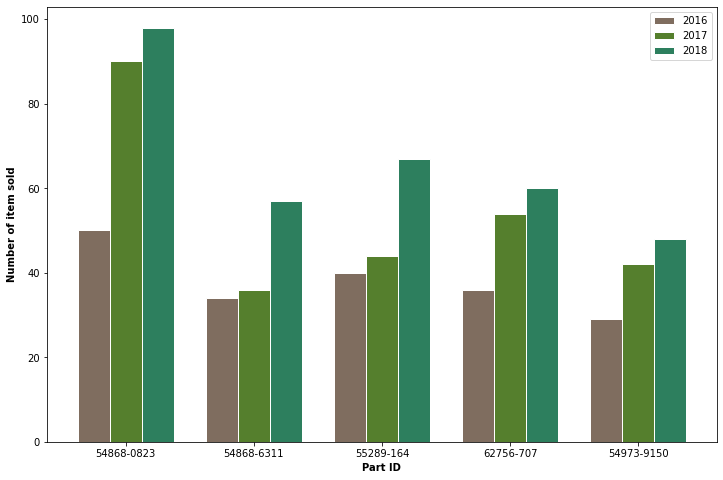

In [35]:
import numpy as np
fig = plt.figure(figsize = (12, 8))
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = pd_partSoldOverYears.Num_sold_item_2016[:5]
bars2 = pd_partSoldOverYears.Num_sold_item_2017[:5]
bars3 = pd_partSoldOverYears.Num_sold_item_2018[:5]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')
 
# Add xticks on the middle of the group bars
plt.xlabel('Part ID', fontweight='bold')
plt.ylabel('Number of item sold', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], pd_partSoldOverYears.part[:5] )
 
# Create legend & Show graphic
plt.legend()
plt.show()


In [36]:
spark.sql("SELECT * FROM partSoldOverYears ORDER BY change_from_2016_to_2018 DESC").show(1)

+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|      part|Num_sold_item_2016|Num_sold_item_2017|Num_sold_item_2018|Num_sold_item_2019|change_from_2017_to_2018|change_from_2016_to_2017|change_from_2016_to_2018|
+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|54868-0823|                50|                90|                98|              null|     0.08888888888888889|                     0.8|                    0.96|
+----------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
only showing top 1 row



**Figure text:**

The items that has become more pupular over the years are the ones shown in the figure above. The bar chart shows number of each part sold in different years as bar char. The item with the largest relative change is 54868-6311 with growth of 96 %

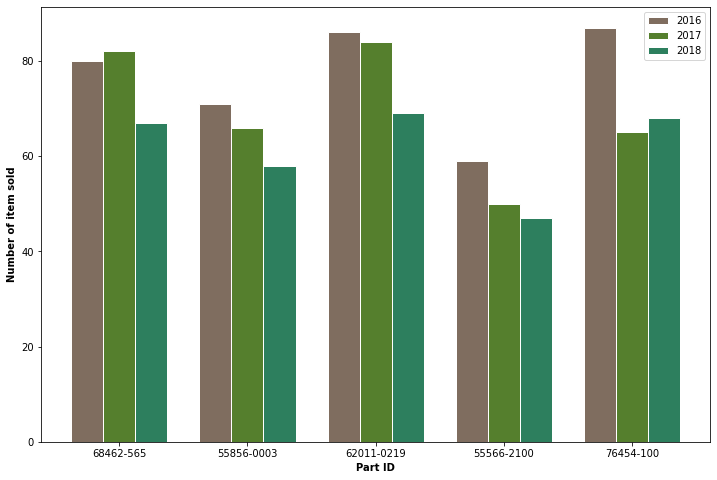

In [37]:
fig = plt.figure(figsize = (12, 8))
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = pd_partSoldOverYears.Num_sold_item_2016[-5:]
bars2 = pd_partSoldOverYears.Num_sold_item_2017[-5:]
bars3 = pd_partSoldOverYears.Num_sold_item_2018[-5:]

 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')
 
# Add xticks on the middle of the group bars
plt.xlabel('Part ID', fontweight='bold')
plt.ylabel('Number of item sold', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], pd_partSoldOverYears.part[-5:])
# Create legend & Show graphic
plt.legend()
plt.show()

In [38]:
spark.sql("SELECT * FROM partSoldOverYears ORDER BY change_from_2016_to_2018 ASC").show(1)

+---------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|     part|Num_sold_item_2016|Num_sold_item_2017|Num_sold_item_2018|Num_sold_item_2019|change_from_2017_to_2018|change_from_2016_to_2017|change_from_2016_to_2018|
+---------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|76454-100|                87|                65|                68|              null|    0.046153846153846156|    -0.25287356321839083|    -0.21839080459770116|
+---------+------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
only showing top 1 row



**Figure text:**

The 5 least popular products arew shown here, the sales has gone downwards since 2016. The purchase of item that has decreased the most is part 0603-6134 with a decrease of almost 22 %  from 2016 to 2018. The graph shows absolute numbers of sales for each year. The table contains information about relative changes.

#### 2.4. What is the average price paid for a part and the price history for parts? (5 pts)

Identify product trends. If a product is very expensive and purchase orders are going down, it might be worth considering the price of the item, as well as its relevance in the market. If a product has suddenly become very popular, it could be interesting to increase the price and see if costumers will continue to buy it, as this could increase profit for the company.

Compute the answer, plot appropriately, and write a paragraph describing the findings.

In [39]:
# finding the average paying over the years by grouping the data
# create dataframe for 2018
q = """ 
    SELECT 
      part, AVG(priceEUR) AS mean_price_18
     FROM 
      TransactionData 
     WHERE 
      YEAR(date) = 2018 
     GROUP BY part 
     """
data2018 = spark.sql(q)
# dataframe for 2017
q = """ 
    SELECT 
      part, AVG(priceEUR) AS mean_price_17
     FROM 
      TransactionData 
     WHERE 
      YEAR(date) = 2017 
     GROUP BY part 
     """
data2017 = spark.sql(q)
# dataframe for 2016
q = """ 
    SELECT 
      part, AVG(priceEUR) AS mean_price_16
     FROM 
      TransactionData 
     WHERE 
      YEAR(date) = 2016
     GROUP BY part 
     """
data2016 = spark.sql(q)
data2016.createOrReplaceTempView("data2016")
data2017.createOrReplaceTempView("data2017")
data2018.createOrReplaceTempView("data2018")

In [40]:
# combine into one table using full join:
q = """
  SELECT 
    data2016.part, 
    data2016.mean_price_16, 
    data2017.mean_price_17, 
    data2018.mean_price_18, 
    (data2018.mean_price_18-data2016.mean_price_16)/data2016.mean_price_16 AS Relative_Change_Price
  FROM 
    data2016
  FULL JOIN 
    data2017
  ON 
    data2016.part = data2017.part
  FULL JOIN 
    data2018
  ON 
    data2016.part = data2018.part
  ORDER BY Relative_Change_Price DESC  
    """
ChangePrice=spark.sql(q)
# five parts that have increase price over the years:
ChangePrice.show(5)

+----------+-----------------+-----------------+-----------------+---------------------+
|      part|    mean_price_16|    mean_price_17|    mean_price_18|Relative_Change_Price|
+----------+-----------------+-----------------+-----------------+---------------------+
| 51060-032|          757.525|741.9069767441861|876.5675675675676|  0.15714671801929658|
|55154-5057|708.1967213114754|747.6901408450705|        812.59375|   0.1474124710648149|
| 10237-832|594.0793650793651|610.3030303030303|681.2878787878788|  0.14679606603885864|
| 49349-820|530.5438596491229|           547.88|595.6296296296297|  0.12267745408183885|
| 49349-842|349.6470588235294|329.7391304347826|391.7704918032787|  0.12047415219645656|
+----------+-----------------+-----------------+-----------------+---------------------+
only showing top 5 rows



In [41]:
# five parts that have decreased price over the years
ChangePrice.orderBy(col("Relative_Change_Price").asc()).show(5)

+----------+------------------+-----------------+------------------+---------------------+
|      part|     mean_price_16|    mean_price_17|     mean_price_18|Relative_Change_Price|
+----------+------------------+-----------------+------------------+---------------------+
|49288-0655|229.03571428571428|           218.96|195.66666666666666| -0.14569364312074434|
| 68084-172| 537.1168831168832|520.1860465116279| 470.9861111111111|  -0.1231217526100017|
|54868-5165| 893.3488372093024|748.1527777777778| 806.7166666666667|  -0.0969746273060169|
|58118-5060|222.33766233766235|          215.625|204.51898734177215| -0.08014240506329122|
| 0228-2167| 897.3239436619718|849.2307692307693| 826.6805555555555| -0.07872673921763548|
+----------+------------------+-----------------+------------------+---------------------+
only showing top 5 rows



**Table text**

The average price change for different parts are saved in dataframe ChangePrice 
where the part where the price has increased the most is shown in the first table and the second table shows the decrease (with negative Relative_Change_Price)

In [42]:
# History of sales of bottom sold 5 items
History_bottom=(Bottom_sold_5.join(TransactionData, "part", "inner"))
# Hisotry of sales of Top 5 items
History_top=(Top_sold_5.join(TransactionData, "part", "inner"))
TopPrice = History_top.groupBy("date","part").agg(f.avg("priceEUR").alias('avg_price'), f.count('part').alias('count_part'))
BotPrice = History_bottom.groupBy("date","part").agg(f.avg("priceEUR").alias('avg_price'), f.count('part').alias('count_part'))

In [43]:
plotTop=(TopPrice.groupby(TopPrice.date)
                    .pivot('part').avg('avg_price').orderBy('date', ascending = True)).toPandas()
plotBot=(BotPrice.groupby(BotPrice.date)
                    .pivot('part').avg('avg_price').orderBy('date', ascending = True)).toPandas()
plotBot=plotBot.set_index('date')
plotTop=plotTop.set_index('date')
           

Text(0, 0.5, 'average price in EUR')

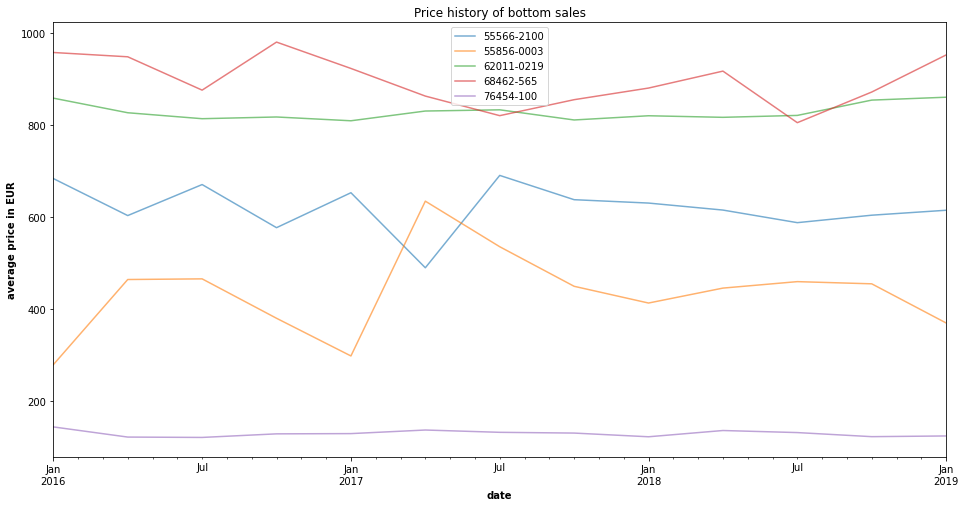

In [44]:
plotBot=plotBot.resample('3M').mean()
plotBot.plot(title ='Price history of bottom sales' ,figsize=(16,8),alpha = 0.6)
plt.xlabel('date', fontweight='bold')
plt.ylabel('average price in EUR', fontweight='bold')

Text(0, 0.5, 'average price in EUR')

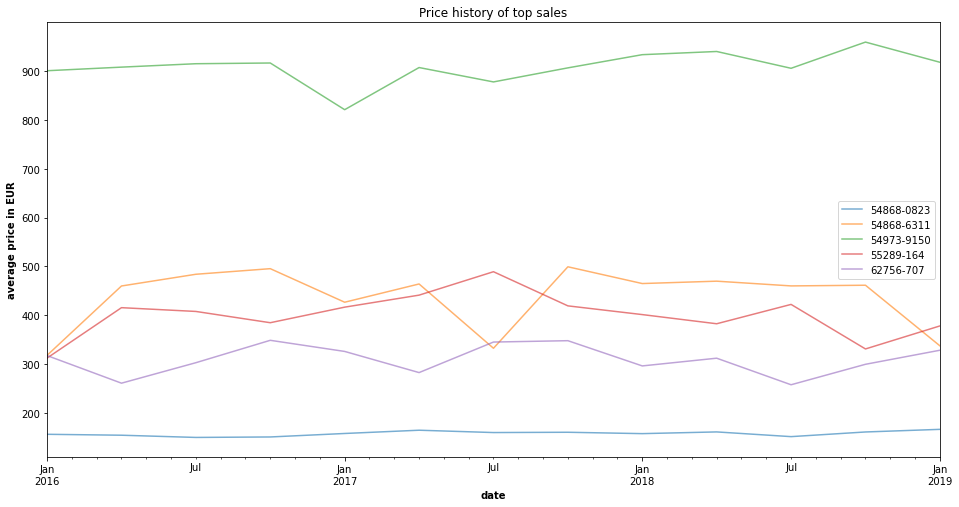

In [45]:
plotTop=plotTop.resample('3M').mean()
plotTop.plot(title ='Price history of top sales' ,figsize=(16,8),alpha = 0.6)
plt.xlabel('date', fontweight='bold')
plt.ylabel('average price in EUR', fontweight='bold')

**text to graph**

54868-6311 is the item with the most relative increase in sales, from the graph here, nothing seems to indicate that the price has anything to do with sale. the same as the less popular items, there has NOT been any significant increase of the price that could lead to the drop in sales.

In [46]:
scatterpl=partSoldOverYears_.join(ChangePrice, "part", "inner").select('part','change_from_2016_to_2018','Relative_Change_Price').toPandas()

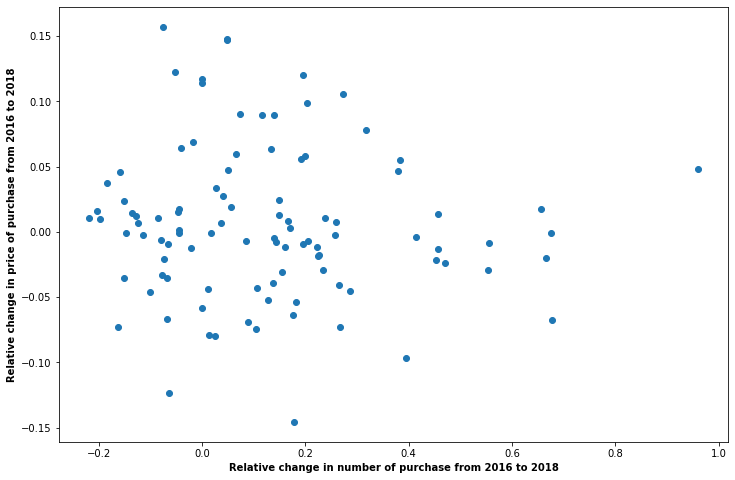

In [47]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(scatterpl.change_from_2016_to_2018, scatterpl.Relative_Change_Price)
# Add xticks on the middle of the group bars
plt.xlabel('Relative change in number of purchase from 2016 to 2018', fontweight='bold')
plt.ylabel('Relative change in price of purchase from 2016 to 2018', fontweight='bold')
plt.show()

**Figure text of the scatter plot**

Each of the dots represent an item (The company sells 100 different parts). The x axis is the relative change in number of purchase from 2016 to 2018, positive number means a increase in number of the product sold. The y axis is the change of the price in same period. 

* We can see that the item that has increased the most in number of purchase has also a negative change in price. And the item with the largest increase in price has decreased in number of items sold. Other than that, the scatterplot does not reveal a general trend of the relations between price and number of items sold.

### Are there any clients for which profit is declining? (12.5 pts)

Declining profit from a specific client may indicate that the client is dissatisfied with the product. Gaining a new client is often much more work than retaining one. Early warnings about declining profit may help your boss fighting customer churn. Answer the following questions and provide appropriate visualisations for each of them. As mentioned before, include headers, legends and well-written descriptions for graphs/charts.


#### 2.5. Compute and visualise the trend in total purchases for all customers, per yearly quarter. (5 pts)


You should also add a paragraph describing your findings.




In [ ]:
totalPurchase=(TransactionData.filter(f.col('date') < '2019-01-01 00:00:00').groupBy("date").agg(f.sum("priceEUR").alias('sum_purchase')).orderBy("date", ascending=True))
totalPurchase_pd=totalPurchase.toPandas()
totalPurchase_pd=totalPurchase_pd.set_index('date')
totalPurchase_pd=totalPurchase_pd.resample('3M').sum()

Text(0, 0.5, 'EUR')

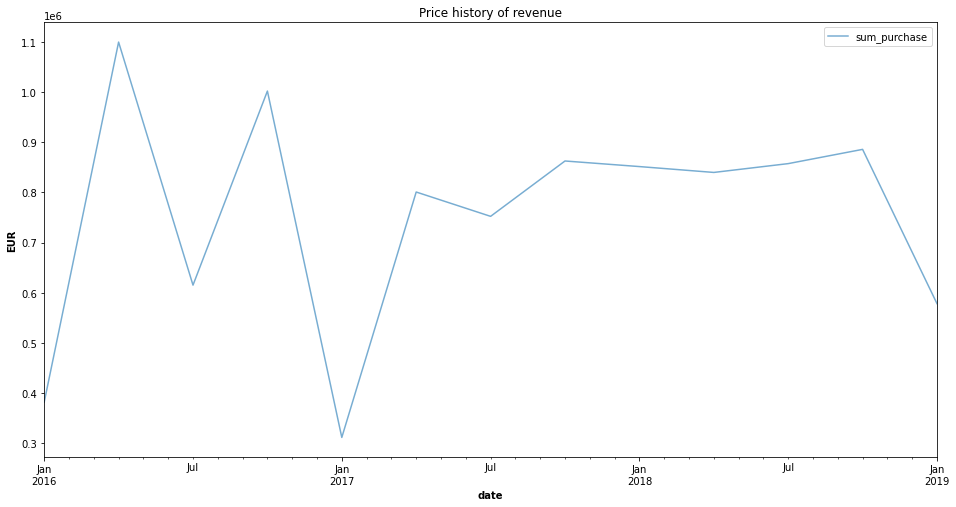

In [ ]:
totalPurchase_pd.plot(title ='Price history of revenue' ,figsize=(16,8),alpha = 0.6)
plt.xlabel('date', fontweight='bold')
plt.ylabel('EUR', fontweight='bold')

**Figure text**

Overall the firm has somewhat stable profit over the years 2017 to 2018. The graph shows the profit over the years. The proft is at it's maximum around the first quater of 2016. There's not enough data to conclude wheater the profit in 2019 is declining. it seems that january in both 2016 and 2017 are the months with the lowest purchases

#### 2.6 Find profit-per-customer trends. (7.5 pts)

Find the customers for which profit declined in 2018, relative to 2016. By how much has profit declined? What are the three customers for which profit is declining the most?

Compute the answer, plot appropriately, and write a paragraph describing the findings.


Text(0, 0.5, 'EUR')

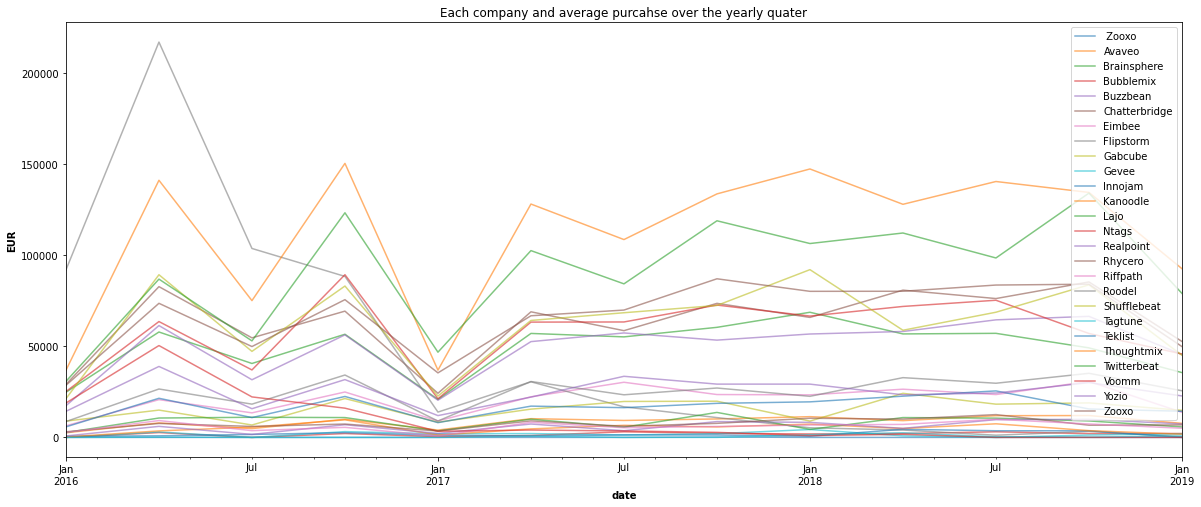

In [ ]:
# group data according to date and company:
gp_date_company = (TransactionData.filter(f.col('date') < '2019-01-01 00:00:00').groupBy("date","company").agg(f.avg("priceEUR").alias('sum_purchase')).orderBy("date", ascending=True))
# pivot in order to have companies as column names
time_Average_purchase=gp_date_company.groupby(f.col('date')).pivot('company').sum('sum_purchase').orderBy('date', ascending = True).fillna(0)
pd_average_purchase=time_Average_purchase.toPandas().set_index('date')
pd_average_purchase=pd_average_purchase.resample('3M').sum()
pd_average_purchase.plot(title ='Each company and average purcahse over the yearly quater' ,figsize=(20,8),alpha = 0.6)
plt.xlabel('date', fontweight='bold')
plt.ylabel('EUR', fontweight='bold')

**Figure text**

Each line indicates a company. It is clear tht there are some companies where the profit has declined over the yeasrs, especially Flipstorm has declined the most.

In [ ]:
Purchase2016=TransactionData.filter(f.col("date").contains("2016")).groupby(f.col('company')).agg(f.sum('priceEUR').alias('sum_2016'))
Purchase2017=TransactionData.filter(f.col("date").contains("2017")).groupby(f.col('company')).agg(f.sum('priceEUR').alias('sum_2017'))
Purchase2018=TransactionData.filter(f.col("date").contains("2018")).groupby(f.col('company')).agg(f.sum('priceEUR').alias('sum_2018'))

Text(0, 0.5, 'AVG EUR')

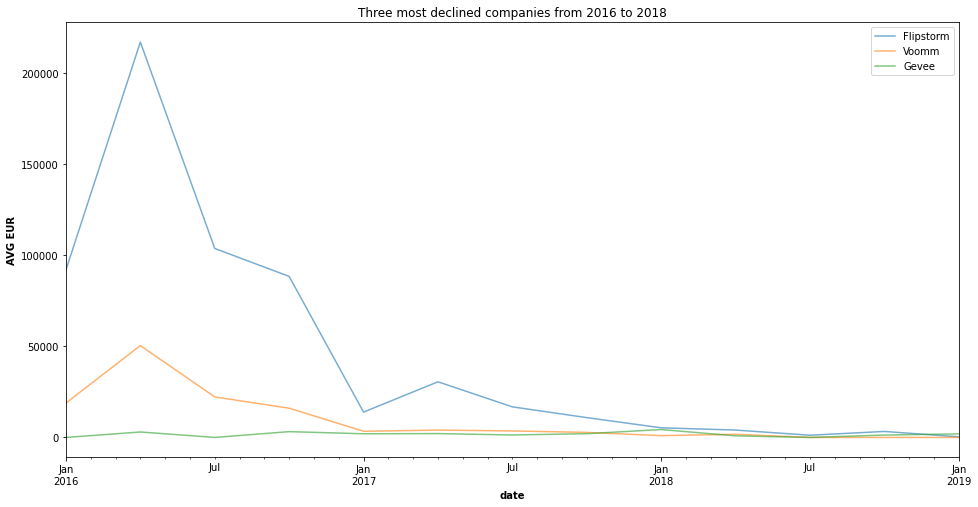

In [ ]:
pd_average_purchase[['Flipstorm','Voomm','Gevee']].plot(title ='Three most declined companies from 2016 to 2018' ,figsize=(16,8),alpha = 0.6)
plt.xlabel('date', fontweight='bold')
plt.ylabel('AVG EUR', fontweight='bold')

In [ ]:
# the name of the companies that has declined the most from 2016 to 2018
# the decline is calculated by percentage the most declined company is Voom around 98%
(Purchase2016
 .join(Purchase2017,'company','left')
 .join(Purchase2018,'company','left')
 .withColumn('decline_from_2016_2018',((F.col('sum_2018')-F.col('sum_2016'))/F.col('sum_2016')))
 .orderBy(f.col('decline_from_2016_2018'), ascending=True)).show(3)

+---------+--------+--------+--------+----------------------+
|  company|sum_2016|sum_2017|sum_2018|decline_from_2016_2018|
+---------+--------+--------+--------+----------------------+
|    Voomm|  107648|   14729|    1716|   -0.9840591557669441|
|Flipstorm|  501332|   75982|   10337|    -0.979380929204599|
|    Gevee|    6172|   10134|    5831|  -0.05524951393389501|
+---------+--------+--------+--------+----------------------+
only showing top 3 rows



**Figure and table text**

This figure shows the three most declined clients based on the measure "decline from 2016 to 2018" Flipstome and Voom have decreased almost 98% of their total purchase. (can see concreate values in table) 

## Part 3: Your own insights (10 pts)

Time to explore the data freely to create two valuable, actionable insights. This is your chance to show your ability to do fully self-directed data analysis. 

Your insights should be non-trivial. A trivial finding would be, e.g., "the number of currencies in which we record transations is $n$". That's not a particularly groundbreaking insight. Dig a bit deeper!

#### 3.1. Add your own query #1 (5 pts)

Impress your boss providing a valuable data-driven insight. Why is this relevant? Describe the query in words and provide appropriate visualisations. Write a paragraph describing your findings.

**Which parts are purchased Flipstorm**
Flipstom is interesting because they are amoung the three client where the profit has declined the most. We are intereted to see which parts they have purchased and if it is a general trend with the products 

In [ ]:
#which products are bought by the most declining client in 2016 compared to 2018
Flipstorm2016=TransactionData.filter(f.col("date").contains("2016")).filter(f.col('company')=='Flipstorm').groupBy(f.col('part')).agg(f.count('part').alias('num_2016'))
Flipstorm2017=TransactionData.filter(f.col("date").contains("2017")).filter(f.col('company')=='Flipstorm').groupBy(f.col('part')).agg(f.count('part').alias('num_2017'))
Flipstorm2018=TransactionData.filter(f.col("date").contains("2018")).filter(f.col('company')=='Flipstorm').groupBy(f.col('part')).agg(f.count('part').alias('num_2018'))

In [ ]:
# select only negative declines
FlipstomePurchase = Flipstorm2016.join(Flipstorm2017,'part','left').join(Flipstorm2018,'part','left').withColumn('numDecline',((F.col('num_2018')-F.col('num_2016'))/F.col('num_2016'))).filter(f.col('numDecline')<0).orderBy(f.col('numDecline'), acsending = True)
FlipstomePurchase_ = FlipstomePurchase.toPandas()
FlipstomePurchase.show()

+----------+--------+--------+--------+-------------------+
|      part|num_2016|num_2017|num_2018|         numDecline|
+----------+--------+--------+--------+-------------------+
| 49348-574|      15|       2|       1|-0.9333333333333333|
|54868-0823|      13|       2|       1|-0.9230769230769231|
| 52959-433|      13|       1|       1|-0.9230769230769231|
| 0268-1128|      13|    null|       1|-0.9230769230769231|
| 0228-2167|      11|    null|       1|-0.9090909090909091|
| 52125-136|      11|       2|       1|-0.9090909090909091|
| 0268-1401|      11|       2|       1|-0.9090909090909091|
| 16590-177|      11|       1|       1|-0.9090909090909091|
|52380-1102|      10|    null|       1|               -0.9|
|24286-1562|       9|    null|       1|-0.8888888888888888|
|48951-4042|       8|    null|       1|             -0.875|
|62670-4404|       8|       1|       1|             -0.875|
| 67544-356|       7|    null|       1|-0.8571428571428571|
|62742-4030|       6|    null|       1|-

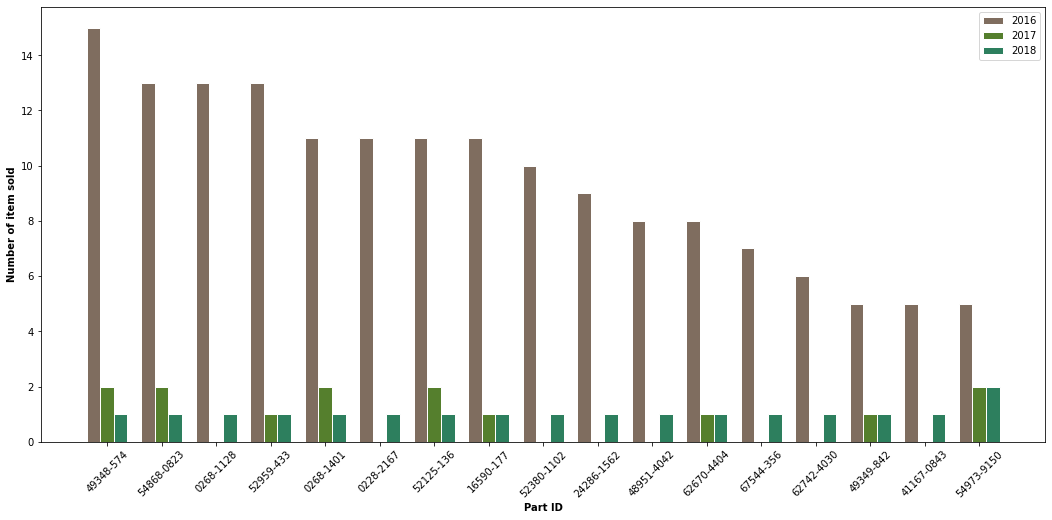

In [ ]:
fig = plt.figure(figsize = (18, 8))
# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = FlipstomePurchase_.num_2016
bars2 = FlipstomePurchase_.num_2017
bars3 = FlipstomePurchase_.num_2018

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='2016')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='2017')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='2018')
 
# Add xticks on the middle of the group bars
plt.xlabel('Part ID', fontweight='bold')
plt.ylabel('Number of item sold', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], FlipstomePurchase_.part)
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()

In [ ]:
# join the table from previous exercise to see if the decrease is general for all companies or just flipstome
FlipstomePurchase.join(partSoldOverYears_, 'part','left').drop('Num_sold_item_2019').show()

+----------+--------+--------+--------+-------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|      part|num_2016|num_2017|num_2018|         numDecline|Num_sold_item_2016|Num_sold_item_2017|Num_sold_item_2018|change_from_2017_to_2018|change_from_2016_to_2017|change_from_2016_to_2018|
+----------+--------+--------+--------+-------------------+------------------+------------------+------------------+------------------------+------------------------+------------------------+
|48951-4042|       8|    null|       1|             -0.875|                56|                68|                71|     0.04411764705882353|     0.21428571428571427|     0.26785714285714285|
| 0268-1401|      11|       2|       1|-0.9090909090909091|                47|                60|                65|     0.08333333333333333|      0.2765957446808511|      0.3829787234042553|
|54868-0823|      13|       2|       1|-

**Text to the graphs**

It's obvious that the client FlipStome has plenty of parts that they no longer purchase after 2016 that has caused the decrease in profit from them since 2016. It is interesting if they discovered if the products does not live up to their desired quality standard or something Kevin's firm can improve. Comparing the product 49348-574 that has decreased the most with the general data for parts sold over the years shows no general decrease with regards to that particular item. Even some items has increased in sales when it has decreased for flipstome.

#### 3.2. Add your own query #2 (5 pts)

Impress your boss providing a valuable data-driven insight. Why is this relevant? Describe the query in words and provide appropriate visualisations. Write a paragraph describing your findings.

In [ ]:
# Where is the compaies placed in the world 
TransactionData.groupby("country").agg(f.countDistinct("company").alias("Nr_differnet_compaines")).orderBy('Nr_differnet_compaines', ascending=False).show()
print('The companies is placed in', TransactionData.select("country").distinct().count(), ' different countries')

+--------------+----------------------+
|       country|Nr_differnet_compaines|
+--------------+----------------------+
|        France|                     7|
|      Portugal|                     6|
|        Greece|                     4|
|         Japan|                     2|
|   Netherlands|                     2|
|United Kingdom|                     2|
|       Germany|                     1|
|         Spain|                     1|
|   Switzerland|                     1|
+--------------+----------------------+

The companies is placed in 9  different countries


In [ ]:
# Are different companies placed in the same city 
TransactionData.groupby("city").agg(f.countDistinct("company").alias("Nr_comapines_in_city")).orderBy("Nr_comapines_in_city", ascending=False).show(5)

+------------+--------------------+
|        city|Nr_comapines_in_city|
+------------+--------------------+
|      Lisbon|                   2|
|      London|                   2|
|Thessaloniki|                   1|
|        Nice|                   1|
|       Braga|                   1|
+------------+--------------------+
only showing top 5 rows



**Answer**
For the 9 different countries then most of the companies is placed in France, Portugal and Greece. But none of the companies is placed in the same city. 

In [ ]:
# Looking if how many different parts is shipped to each country 
TransactionData.groupby("Country").agg(f.countDistinct("part").alias("Differnt_parts")).orderBy("Differnt_parts", ascending=False).show()

+--------------+--------------+
|       Country|Differnt_parts|
+--------------+--------------+
|       Germany|           100|
|        France|           100|
|        Greece|           100|
|      Portugal|           100|
|United Kingdom|           100|
|         Spain|           100|
|   Netherlands|            98|
|         Japan|            74|
|   Switzerland|            11|
+--------------+--------------+



In [ ]:
# Lookig on how many parts is shipped to each country 
TransactionData.groupby("Country").agg(f.count("part").alias("Parts_ship_total")).orderBy("Parts_ship_total", ascending=False).show()

+--------------+----------------+
|       Country|Parts_ship_total|
+--------------+----------------+
|      Portugal|            7047|
|        France|            3447|
|        Greece|            1958|
|United Kingdom|            1511|
|         Spain|            1423|
|       Germany|            1123|
|   Netherlands|             427|
|         Japan|             159|
|   Switzerland|              11|
+--------------+----------------+



**Answer**
Most of the countries except Japan and Switzerland have gotten all the part sendt to. Portugal and France are the countries that boy most parts.  

In [ ]:
# For the top 5 selling parts which place is it shipped to the most? 
df_top_part = Top_sold_5.selectExpr("part")
df_top_part = TransactionData.join(df_top_part, on='part', how='inner')
top_part = df_top_part.groupby("country").pivot('part').agg(f.count("country")).orderBy("54868-0823", ascending=False).toPandas()
top_part = top_part.set_index("country")
top_part

,54868-0823,54868-6311,54973-9150,55289-164,62756-707
country,,,,,
Portugal,92,58,43,55.0,56
France,47,25,14,31.0,29
Greece,27,11,16,17.0,14
Spain,22,6,14,12.0,14
United Kingdom,22,14,20,16.0,20
Germany,20,9,5,16.0,12
Netherlands,7,2,2,4.0,4
Japan,1,2,5,NaN,1


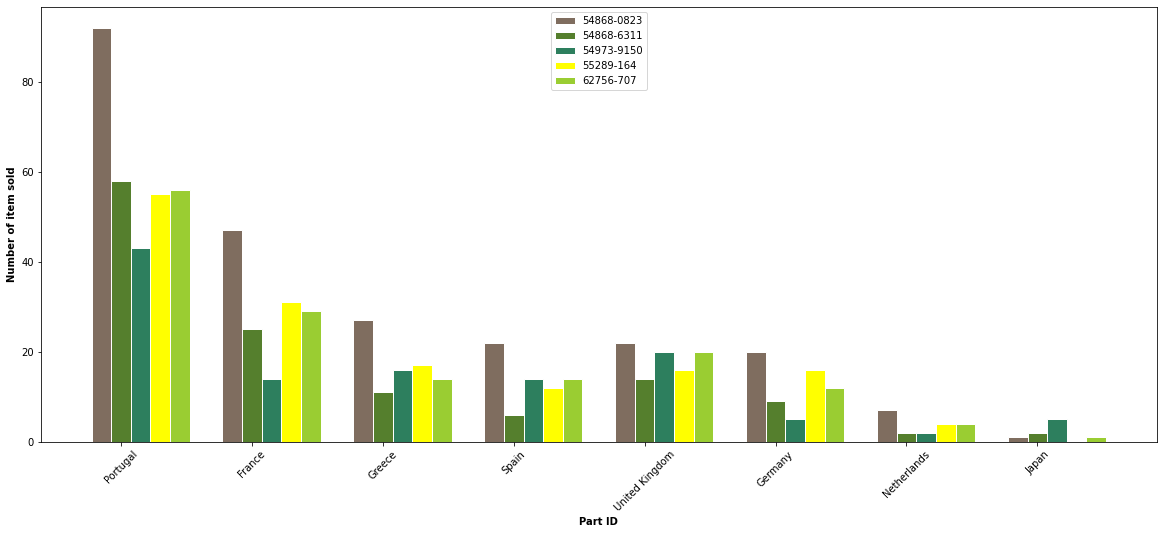

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (20, 8))
# set width of bar
barWidth = 0.15
 
# set height of bar
bars1 = top_part["54868-0823"]
bars2 = top_part["54868-6311"]
bars3 = top_part["54973-9150"]
bars4 = top_part["55289-164"]
bars5 = top_part["62756-707"]

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='54868-0823')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='54868-6311')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='54973-9150')
plt.bar(r4, bars4, color='#FFFF00', width=barWidth, edgecolor='white', label='55289-164')
plt.bar(r5, bars5, color='#9ACD32', width=barWidth, edgecolor='white', label='62756-707')

 
# Add xticks on the middle of the group bars
plt.xlabel('Part ID', fontweight='bold')
plt.ylabel('Number of item sold', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], top_part.index)
plt.xticks(rotation=45)
# Create legend & Show graphic
plt.legend()
plt.show()

**Answer**
The plot has the 5 top sold parts that is found in part 2. It can be seen that the country that get send most parts is Portugal. France, Greece, Spain and the United Kingdom boys around the same amount of parts. 

In [ ]:
# Where is the top 5 companies placed 
df_top_company = Top_comp_5.selectExpr("company")
df_top_company = TransactionData.join(df_top_company, on='company', how='inner')
df_top_company.groupby("country").pivot('company').agg(f.count("part")).show()

+--------------+-------------+-----------+----------+-----------+-----+
|       country|Chatterbridge|Shufflebeat|Thoughtmix|Twitterbeat|Zooxo|
+--------------+-------------+-----------+----------+-----------+-----+
|        France|         null|       null|      null|       2034| null|
|         Spain|         1423|       null|      null|       null| null|
|      Portugal|         null|       1380|      2506|       null| null|
|United Kingdom|         null|       null|      null|       null| 1509|
+--------------+-------------+-----------+----------+-----------+-----+



In [ ]:
df_parts = TransactionData.groupby("part").pivot("country").agg(f.count("part")).orderBy("Portugal", ascending=False).show()

+----------+------+-------+------+-----+-----------+--------+-----+-----------+--------------+
|      part|France|Germany|Greece|Japan|Netherlands|Portugal|Spain|Switzerland|United Kingdom|
+----------+------+-------+------+-----+-----------+--------+-----+-----------+--------------+
| 68462-565|    40|     10|    20| null|          9|     115|   20|       null|            15|
|58118-5060|    54|     14|    31|    3|          3|     111|   16|       null|            20|
| 51346-145|    39|     16|    25|    4|          2|     109|   22|          1|            23|
| 37205-992|    50|     20|    30|    1|          5|     108|   18|       null|            21|
| 52125-136|    43|     20|    26| null|          6|     107|   17|       null|            13|
| 51138-049|    46|     11|    27|    1|          5|     107|   23|       null|            16|
| 68084-172|    41|     21|    20|    1|          5|     106|   28|       null|            13|
| 49348-574|    34|     20|    32|    1|          